In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importing the Datasets

In [ ]:
df_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [ ]:
df_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [ ]:
df_dy_wy_ratio_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [ ]:
df_dy_wy_ratio_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')

## Histogram of Features

### Summer (All DY/WY Ratios)

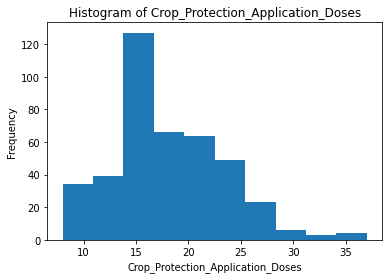

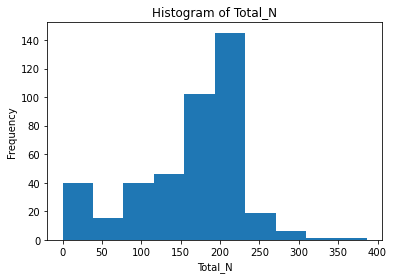

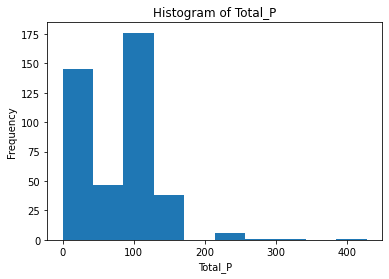

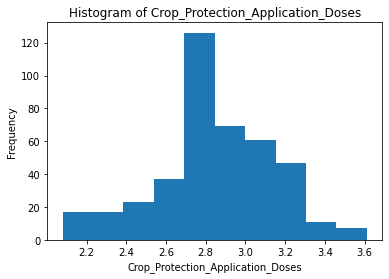

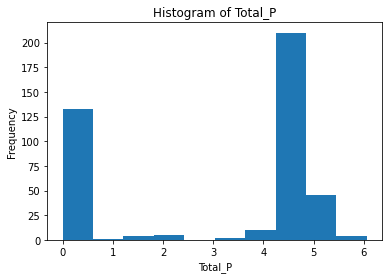

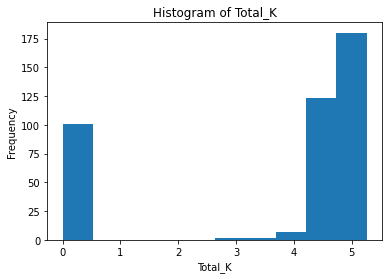

In [11]:
#x values
for column in df_summer_combined_parents.columns:
    plt.hist(df_summer_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
# df_summer_combined_parents['Crop_Protection_Application_Doses'] = np.log(df_summer_combined_parents['Crop_Protection_Application_Doses'])
# df_summer_combined_parents['Total_N'] = np.log(df_summer_combined_parents['Total_N'] + 1)
# df_summer_combined_parents['Total_P'] = np.log(df_summer_combined_parents['Total_P'] + 1)
# df_summer_combined_parents['Total_K'] = np.log(df_summer_combined_parents['Total_K'] + 1)
    
# for column in df_summer_combined_parents.columns:
#     plt.hist(df_summer_combined_parents[column], bins = 10)
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of {column}')
#     plt.show()

### Winter (All DY/WY Ratios)

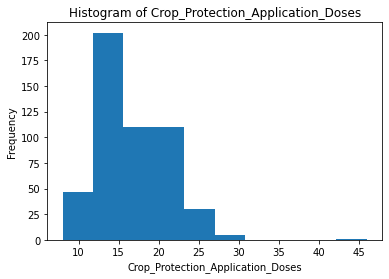

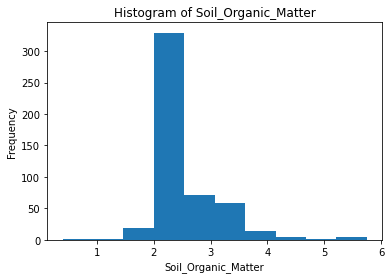

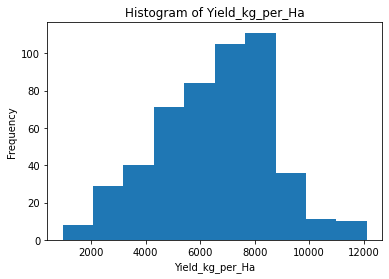

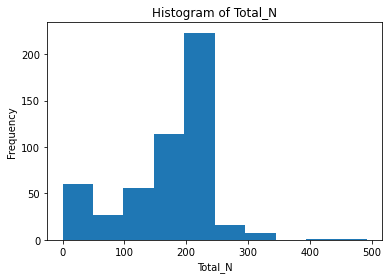

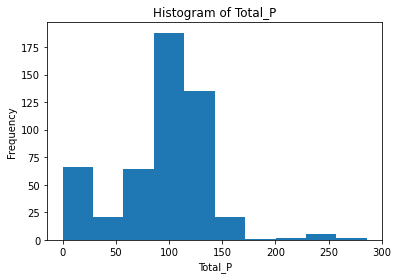

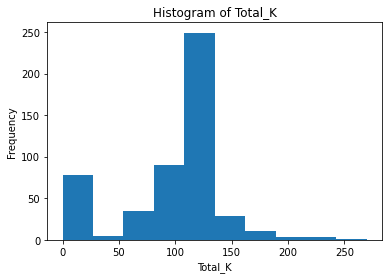

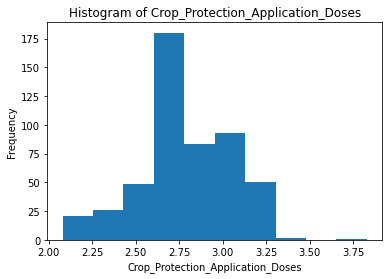

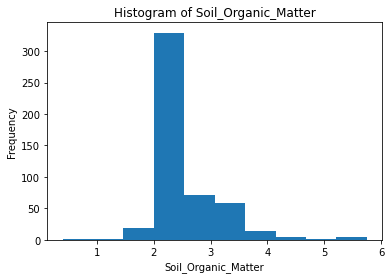

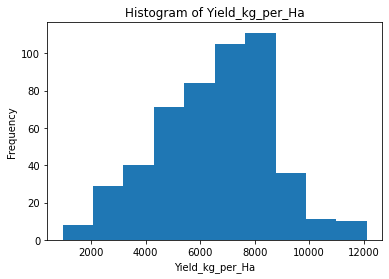

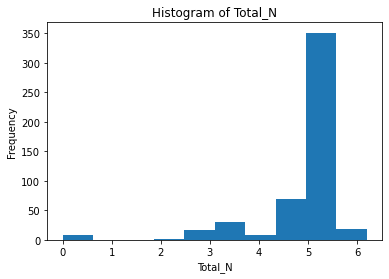

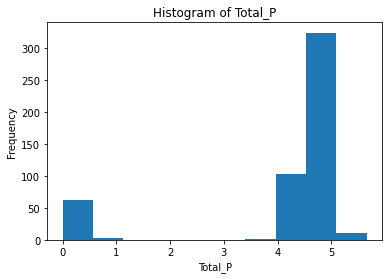

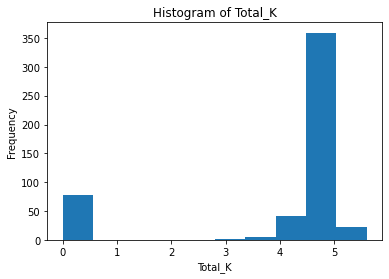

In [14]:
#x values
for column in df_winter_combined_parents.columns:
    plt.hist(df_winter_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
df_winter_combined_parents['Crop_Protection_Application_Doses'] = np.log(df_winter_combined_parents['Crop_Protection_Application_Doses'])
df_winter_combined_parents['Total_N'] = np.log(df_winter_combined_parents['Total_N'] + 1)
df_winter_combined_parents['Total_P'] = np.log(df_winter_combined_parents['Total_P'] + 1)
df_winter_combined_parents['Total_K'] = np.log(df_winter_combined_parents['Total_K'] + 1)
    
for column in df_winter_combined_parents.columns:
    plt.hist(df_winter_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

### Summer (.2 < DY/WY < .6)

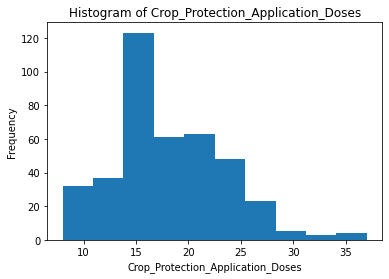

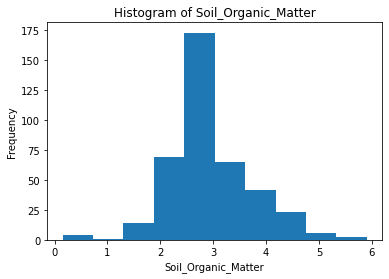

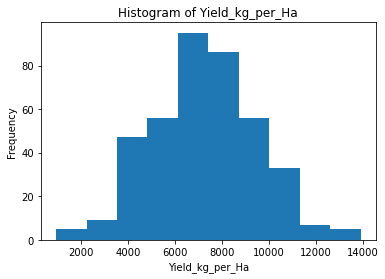

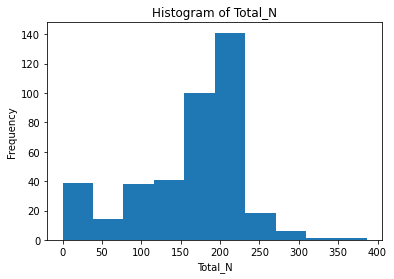

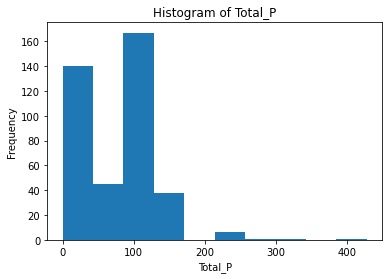

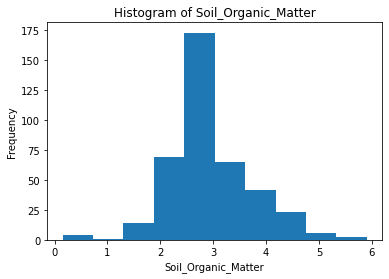

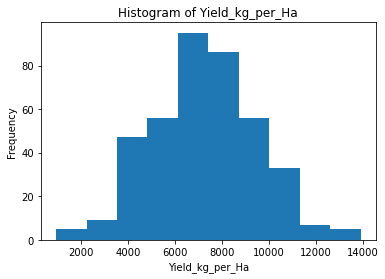

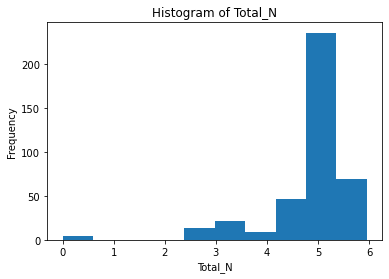

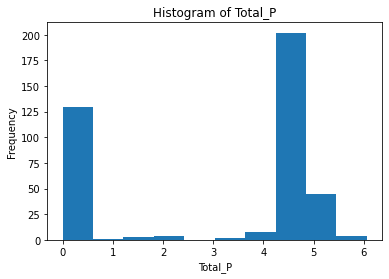

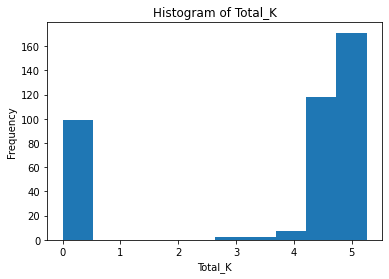

In [15]:
#x values
for column in df_dy_wy_ratio_summer_combined_parents.columns:
    plt.hist(df_dy_wy_ratio_summer_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
df_dy_wy_ratio_summer_combined_parents['Crop_Protection_Application_Doses'] = np.log(df_dy_wy_ratio_summer_combined_parents['Crop_Protection_Application_Doses'])
df_dy_wy_ratio_summer_combined_parents['Total_N'] = np.log(df_dy_wy_ratio_summer_combined_parents['Total_N'] + 1)
df_dy_wy_ratio_summer_combined_parents['Total_P'] = np.log(df_dy_wy_ratio_summer_combined_parents['Total_P'] + 1)
df_dy_wy_ratio_summer_combined_parents['Total_K'] = np.log(df_dy_wy_ratio_summer_combined_parents['Total_K'] + 1)
    
for column in df_dy_wy_ratio_summer_combined_parents.columns:
    plt.hist(df_dy_wy_ratio_summer_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

### Winter (.2 < DY/WY < .6)

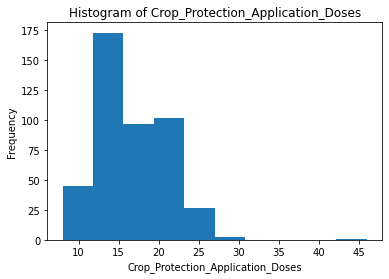

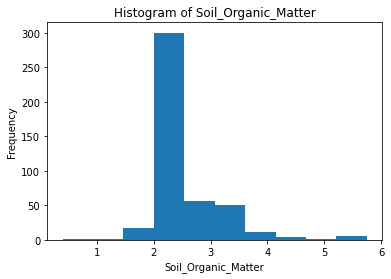

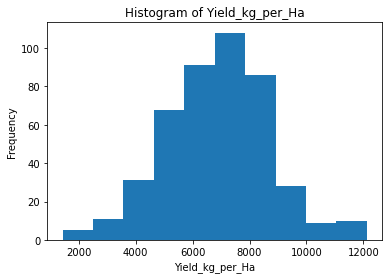

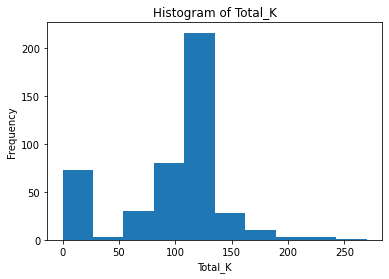

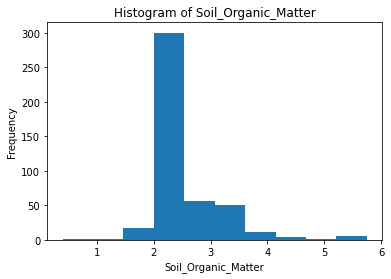

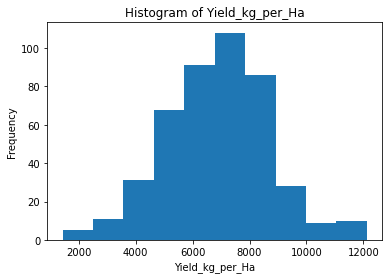

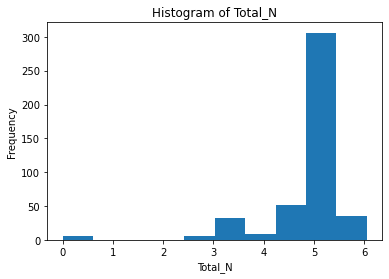

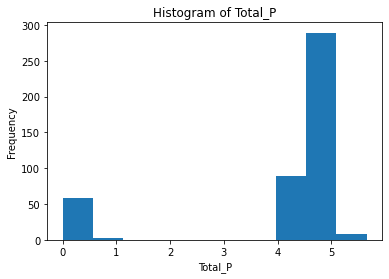

In [16]:
#x values
for column in df_dy_wy_ratio_winter_combined_parents.columns:
    plt.hist(df_dy_wy_ratio_winter_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
df_dy_wy_ratio_winter_combined_parents['Crop_Protection_Application_Doses'] = np.log(df_dy_wy_ratio_winter_combined_parents['Crop_Protection_Application_Doses'])
df_dy_wy_ratio_winter_combined_parents['Total_N'] = np.log(df_dy_wy_ratio_winter_combined_parents['Total_N'] + 1)
df_dy_wy_ratio_winter_combined_parents['Total_P'] = np.log(df_dy_wy_ratio_winter_combined_parents['Total_P'] + 1)
df_dy_wy_ratio_winter_combined_parents['Total_K'] = np.log(df_dy_wy_ratio_winter_combined_parents['Total_K'] + 1)
    
for column in df_dy_wy_ratio_winter_combined_parents.columns:
    plt.hist(df_dy_wy_ratio_winter_combined_parents[column], bins = 10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

# Model Building Function

In [23]:
def build_models(dataset, outlier_removal_lower_percentile, seed):
    #filter outliers
    dataset = dataset[(dataset['Yield_kg_per_Ha'] > dataset['Yield_kg_per_Ha'].quantile(outlier_removal_lower_percentile)) \
                                                                   & (dataset['Yield_kg_per_Ha'] < dataset['Yield_kg_per_Ha'].quantile(1-outlier_removal_lower_percentile))].reset_index(drop = True)

    #train/test split
    train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(dataset, test_size = 0.2, random_state = seed)

    #x values
    X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
    X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
    standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
    X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)
    X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)

    #y_values
    y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)
    mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()
    y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)
    standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))
    y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)
    y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

    ####Initialize K fold Cross validation
    kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

    #####Grid Space for Lasso, Ridge, ElasticNet
    alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
    alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
    e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
    e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

    ####Model Building
#     model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
    model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
    models = [linear_model.LinearRegression(), \
                LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                      RidgeCV(alphas = alphas_alt, cv = kfolds), \
                      ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                      SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
#                       LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
#                                     bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                      GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                                min_samples_split = 10, loss = 'huber', random_state = 42), \
                      XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                                   colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
             ]

    fitted_models = []
    Test_MAE_models = []
    Test_RMSE_models = []
    Test_R2_models = []
    Test_mape_models = []

    for model in models:
        fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
        inv_transform_y_actuals = standard_scaler_y.inverse_transform(y_test_Yield_kg_per_ha)
        inv_transformed_preds = standard_scaler_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))                                             
        Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
        Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
        Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
        Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))

    for model_name in model_names:
        print(model_name)
        print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
        print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
        print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
        print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
        inv_transformed_y_actuals = standard_scaler_y.inverse_transform(y_test_Yield_kg_per_ha)
        inv_transformed_preds = standard_scaler_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1))
        fig, ax = plt.subplots()
        ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
        ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
        lims = [
            np.min([ax.get_xlim(), ax.get_ylim()]),
            np.max([ax.get_xlim(), ax.get_ylim()]),
        ]
        ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
        plt.xlabel('Actual Target')
        plt.ylabel('Predicted Target')
        plt.title(model_name + ' (Target: Yield kg per ha)')
        plt.legend()
        plt.show()
    return Test_R2_models[6]

# Importing Datasets

In [4]:
df_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [5]:
df_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [6]:
df_dy_wy_ratio_summer_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_summer_combined_parents.csv').drop(columns = 'Unnamed: 0')

In [7]:
df_dy_wy_ratio_winter_combined_parents = pd.read_csv('/mnt/Wet_yield_prediction/Organized_Work/Datasets/df_dy_wy_ratio_winter_combined_parents.csv').drop(columns = 'Unnamed: 0')

## Model Building Dataset 1: Summer Combined Parents

[20:26:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1732.5883906460679
RMSE on test data: 2269.6000267430463
R squared on test data: -0.047415891825218326
MAPE on test data: 29.484199454036464


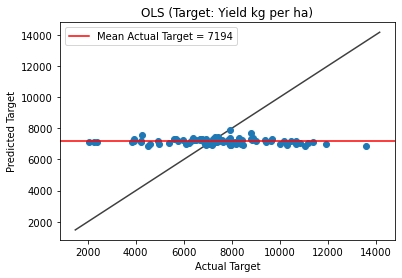

Lasso
MAE on test data: 1732.2144744333586
RMSE on test data: 2268.633745041183
R squared on test data: -0.04652420752122843
MAPE on test data: 29.484250404426177


Ridge
MAE on test data: 1731.3509634400718
RMSE on test data: 2267.304382971613
R squared on test data: -0.04529809336104962
MAPE on test data: 29.48101338885391


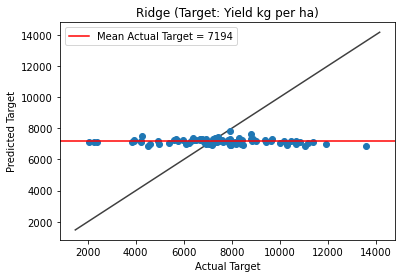

ElasticNet
MAE on test data: 1732.2612037401648
RMSE on test data: 2268.753715555545
R squared on test data: -0.046634895610464744
MAPE on test data: 29.48424388706716


SVR
MAE on test data: 1679.7740149178258
RMSE on test data: 2220.106487800095
R squared on test data: -0.002231653661900701
MAPE on test data: 28.937331237484965


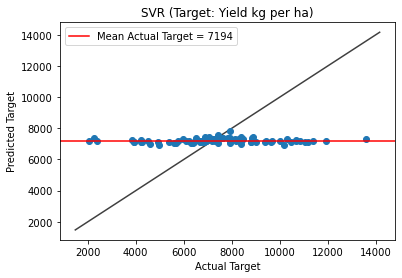

GBR
MAE on test data: 2077.3760430502016
RMSE on test data: 2595.579047468481
R squared on test data: -0.3699004947182982
MAPE on test data: 33.44871458234386


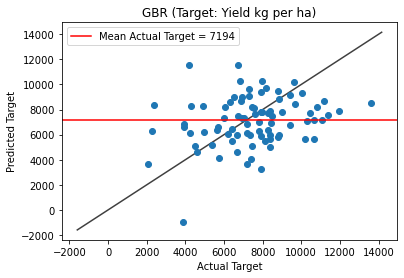

XGBoost
MAE on test data: 1815.0710736314015
RMSE on test data: 2232.64125620386
R squared on test data: -0.013580844782231871
MAPE on test data: 28.38067969880561


[20:26:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1773.7557767528776
RMSE on test data: 2265.6939436722005
R squared on test data: -0.06857596548928968
MAPE on test data: 35.315696533657736


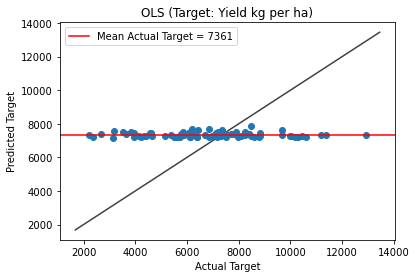

Lasso
MAE on test data: 1773.6281689976117
RMSE on test data: 2265.2563639175955
R squared on test data: -0.06816325126824152
MAPE on test data: 35.31366015196703


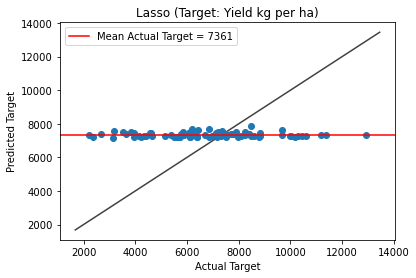

Ridge
MAE on test data: 1773.6905064820273
RMSE on test data: 2265.4783254388335
R squared on test data: -0.06837258983112204
MAPE on test data: 35.317931033352515


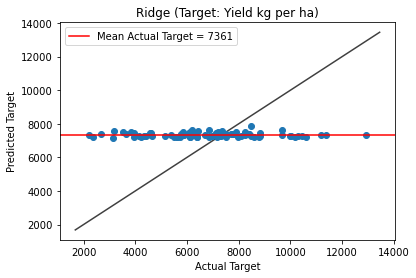

ElasticNet
MAE on test data: 1773.6441436621812
RMSE on test data: 2265.310829097302
R squared on test data: -0.06821461711253751
MAPE on test data: 35.313914870949134


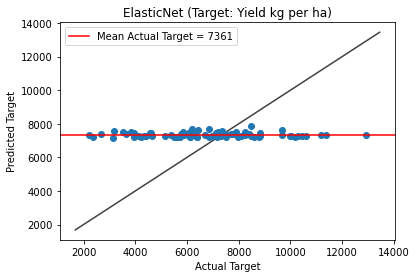

SVR
MAE on test data: 1809.0465540643995
RMSE on test data: 2303.27203393728
R squared on test data: -0.104316047412371
MAPE on test data: 35.859632522400695


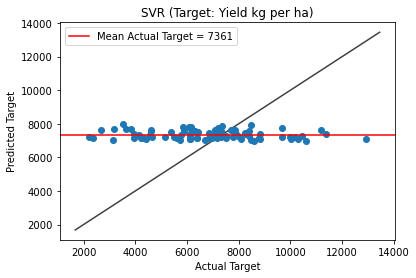

GBR
MAE on test data: 1806.9850662624333
RMSE on test data: 2346.026399552148
R squared on test data: -0.14569417219932035
MAPE on test data: 33.615977366163904


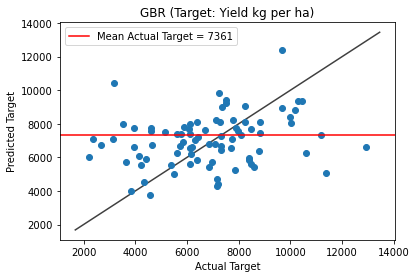

XGBoost
MAE on test data: 1734.3783528057115
RMSE on test data: 2260.316538331872
R squared on test data: -0.06350966151228321
MAPE on test data: 33.0290001056794


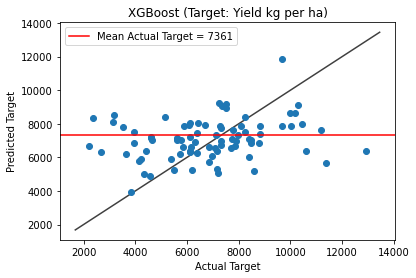

[20:26:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1772.6442293935709
RMSE on test data: 2119.6433196026996
R squared on test data: -0.0751729905173193
MAPE on test data: 27.339703367502068


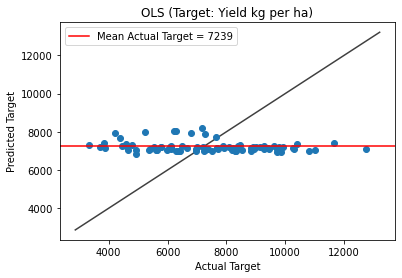

Lasso
MAE on test data: 1771.4640649871599
RMSE on test data: 2118.4276654376818
R squared on test data: -0.0739400814644442
MAPE on test data: 27.32064222613275


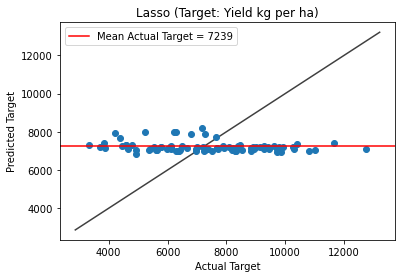

Ridge
MAE on test data: 1768.2245210192173
RMSE on test data: 2115.3417629993487
R squared on test data: -0.0708135545853521
MAPE on test data: 27.27872537442299


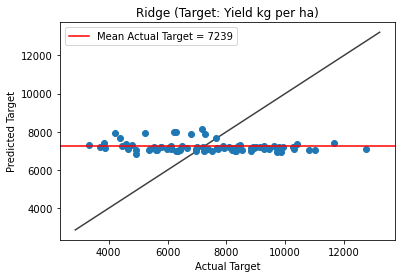

ElasticNet
MAE on test data: 1771.6116017553231
RMSE on test data: 2118.579018600054
R squared on test data: -0.07409354437162463
MAPE on test data: 27.323024985592394


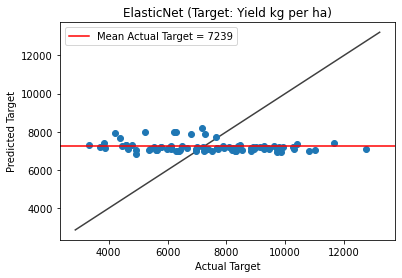

SVR
MAE on test data: 1747.6935172882002
RMSE on test data: 2109.556277002541
R squared on test data: -0.06496418783934721
MAPE on test data: 26.930459451888783


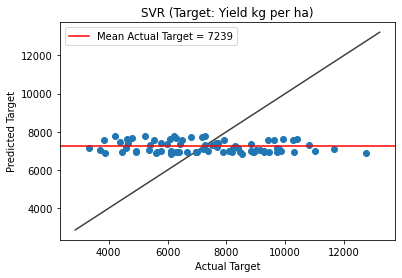

GBR
MAE on test data: 2058.3411085689886
RMSE on test data: 2594.3788659080624
R squared on test data: -0.6107182085574254
MAPE on test data: 28.788859752768282


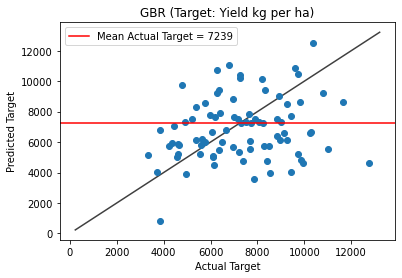

XGBoost
MAE on test data: 1850.1594284593796
RMSE on test data: 2415.6456352362256
R squared on test data: -0.39643017093587796
MAPE on test data: 25.780840170202385


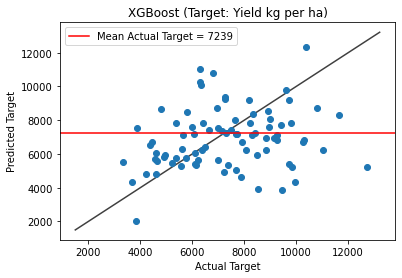

[20:27:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1848.0345680410624
RMSE on test data: 2339.0407956388526
R squared on test data: -0.02797625150206673
MAPE on test data: 34.37621773315202


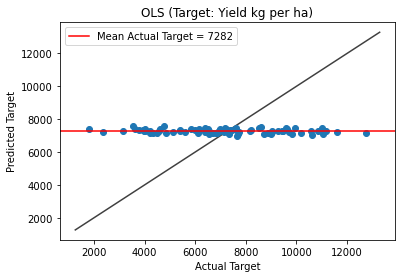

Lasso
MAE on test data: 1846.9688076873517
RMSE on test data: 2337.697493535296
R squared on test data: -0.026795864955726056
MAPE on test data: 34.36409469434841


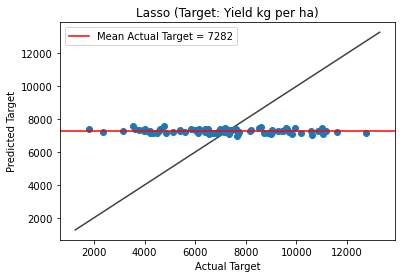

Ridge
MAE on test data: 1846.6210746600927
RMSE on test data: 2337.388727861228
R squared on test data: -0.02652464219846329
MAPE on test data: 34.353776251365296


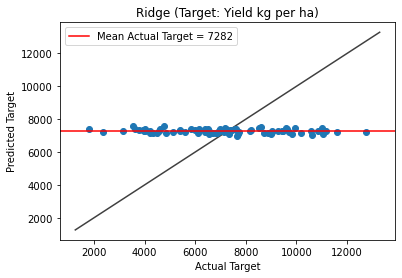

ElasticNet
MAE on test data: 1847.1020508316772
RMSE on test data: 2337.8648774781573
R squared on test data: -0.026942911606506748
MAPE on test data: 34.365610423756074


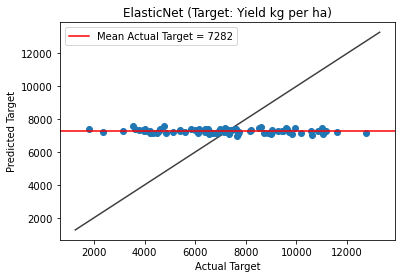

SVR
MAE on test data: 1854.7095848571857
RMSE on test data: 2349.738729109456
R squared on test data: -0.03740094408676975
MAPE on test data: 34.4914957155439


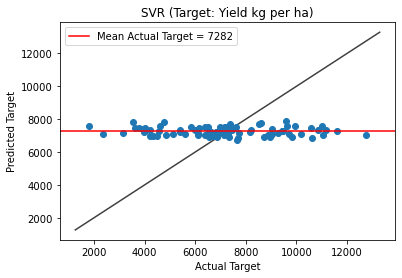

GBR
MAE on test data: 2020.4147982857953
RMSE on test data: 2524.8742901365604
R squared on test data: -0.19780744698355157
MAPE on test data: 33.19791173778567


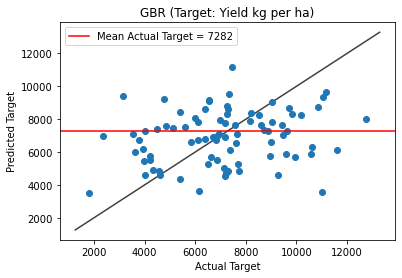

XGBoost
MAE on test data: 1905.4680837974795
RMSE on test data: 2373.6842415998476
R squared on test data: -0.05865238893764846
MAPE on test data: 32.48057139575419


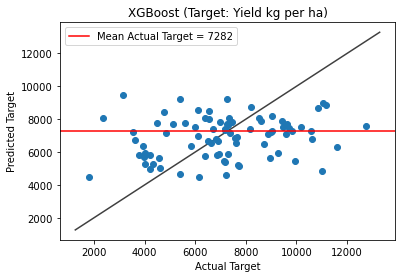

[20:27:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1385.9813419819045
RMSE on test data: 1687.5696241200267
R squared on test data: -0.054379661097001764
MAPE on test data: 22.29626565773856


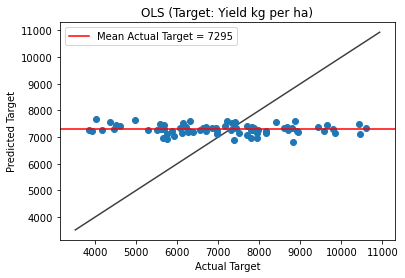

Lasso
MAE on test data: 1385.0269481534076
RMSE on test data: 1686.5269713765692
R squared on test data: -0.05307718181879162
MAPE on test data: 22.279802174940883


Ridge
MAE on test data: 1383.0218866351624
RMSE on test data: 1684.3091728113368
R squared on test data: -0.05030939038480975
MAPE on test data: 22.24677631682972


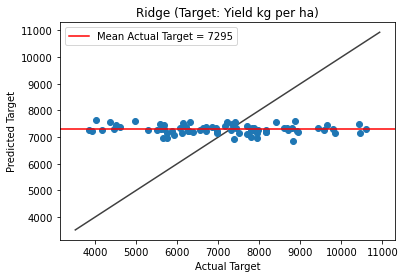

ElasticNet
MAE on test data: 1385.1462549936214
RMSE on test data: 1686.6568601666966
R squared on test data: -0.05323939468651817
MAPE on test data: 22.28186027444984


SVR
MAE on test data: 1366.7858696107369
RMSE on test data: 1668.0482719655906
R squared on test data: -0.030127188724433873
MAPE on test data: 21.71062691199821


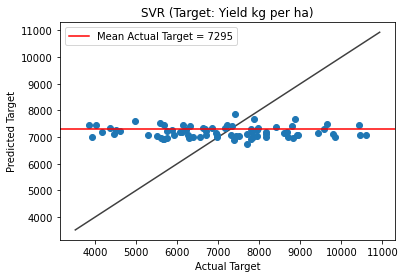

GBR
MAE on test data: 1535.4609052521912
RMSE on test data: 1950.2655270380653
R squared on test data: -0.40818952395801467
MAPE on test data: 24.254662321931857


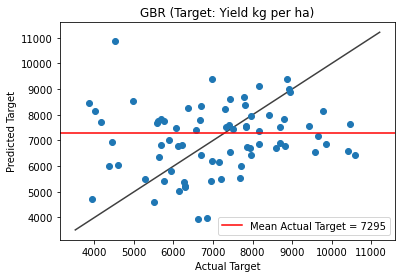

XGBoost
MAE on test data: 1500.4652088242817
RMSE on test data: 1959.2193153756768
R squared on test data: -0.42114937404973274
MAPE on test data: 23.711884299788004


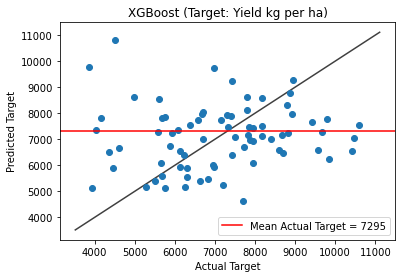

[20:28:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1466.759435950584
RMSE on test data: 1792.1348426469408
R squared on test data: -0.0739779375139662
MAPE on test data: 23.81577106195316


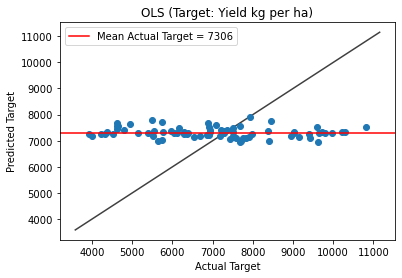

Lasso
MAE on test data: 1466.733798052564
RMSE on test data: 1792.0970780105583
R squared on test data: -0.07393267534061176
MAPE on test data: 23.815351497361146


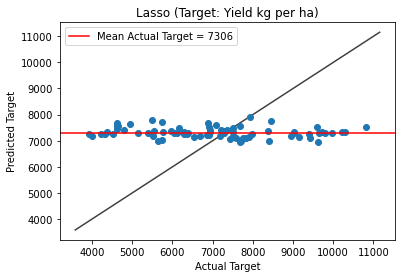

Ridge
MAE on test data: 1463.8647857363237
RMSE on test data: 1789.1507086019578
R squared on test data: -0.0704042936439897
MAPE on test data: 23.769968979384572


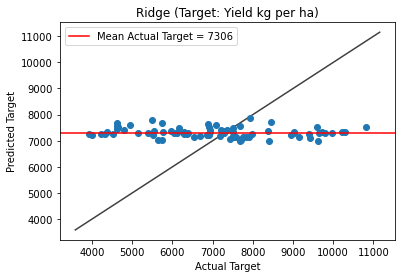

ElasticNet
MAE on test data: 1466.717062715684
RMSE on test data: 1792.0730764453162
R squared on test data: -0.07390390916172618
MAPE on test data: 23.815078587060277


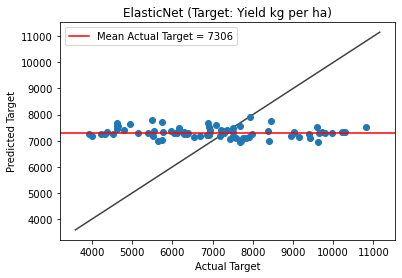

SVR
MAE on test data: 1481.9890650676248
RMSE on test data: 1802.439338612462
R squared on test data: -0.0863638554161843
MAPE on test data: 23.7545852410816


GBR
MAE on test data: 1636.171022913238
RMSE on test data: 1920.743054912268
R squared on test data: -0.23365162736874234
MAPE on test data: 24.66838993705906


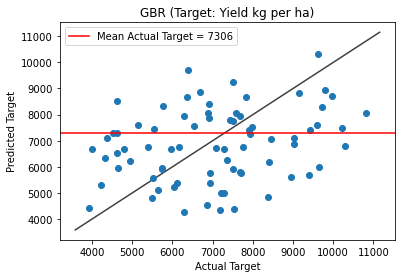

XGBoost
MAE on test data: 1580.0053586479082
RMSE on test data: 1854.2894034228266
R squared on test data: -0.14976484577400329
MAPE on test data: 24.512939976353092


[20:28:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1529.0266071505555
RMSE on test data: 1823.1993575392023
R squared on test data: -0.09552285289908391
MAPE on test data: 22.179383630025782


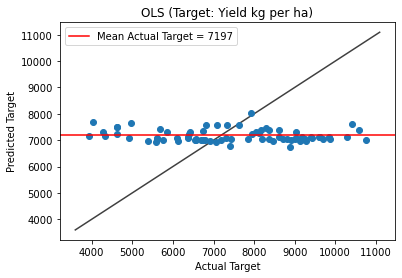

Lasso
MAE on test data: 1528.3470017403538
RMSE on test data: 1822.4385876261385
R squared on test data: -0.09460878177857479
MAPE on test data: 22.168508777814846


Ridge
MAE on test data: 1524.9346922440977
RMSE on test data: 1818.6495247164705
R squared on test data: -0.09006187418797973
MAPE on test data: 22.11822840490363


ElasticNet
MAE on test data: 1528.4319583266442
RMSE on test data: 1822.5333996044033
R squared on test data: -0.0947226783173658
MAPE on test data: 22.1698682194273


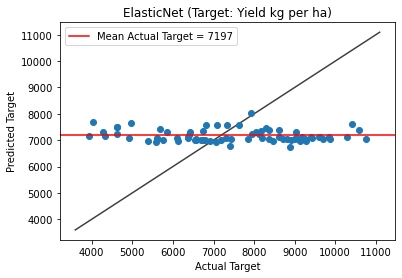

SVR
MAE on test data: 1535.939436751397
RMSE on test data: 1845.2629340973715
R squared on test data: -0.12219838532975213
MAPE on test data: 22.049357763068045


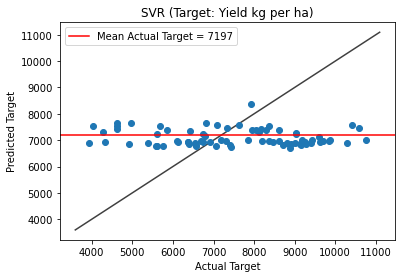

GBR
MAE on test data: 1635.7292504868622
RMSE on test data: 1945.680645626228
R squared on test data: -0.2476599686217933
MAPE on test data: 23.766795139046717


XGBoost
MAE on test data: 1569.9192265623017
RMSE on test data: 1910.7763025326587
R squared on test data: -0.20329695100969203
MAPE on test data: 22.657736007619267


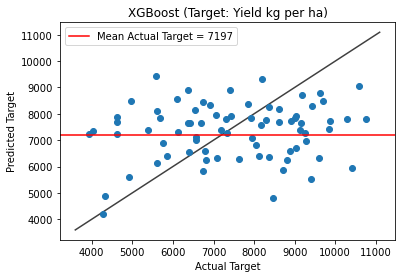

[20:28:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1472.479773261334
RMSE on test data: 1793.3842799283912
R squared on test data: -0.13713644232000743
MAPE on test data: 25.61392737802927


Lasso
MAE on test data: 1472.2158839491428
RMSE on test data: 1792.9341866828072
R squared on test data: -0.136565730051333
MAPE on test data: 25.60979654738101


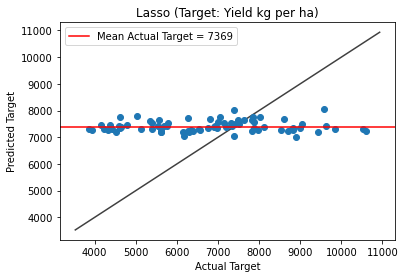

Ridge
MAE on test data: 1471.3266908748915
RMSE on test data: 1791.8134680051207
R squared on test data: -0.1351452960494668
MAPE on test data: 25.595444508072234


ElasticNet
MAE on test data: 1472.248880208345
RMSE on test data: 1792.989906314658
R squared on test data: -0.13663637403656326
MAPE on test data: 25.61031306027754


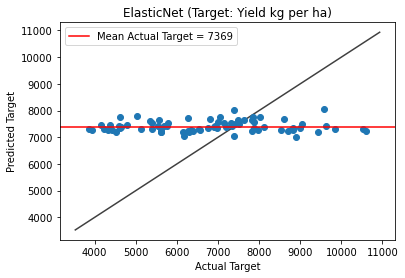

SVR
MAE on test data: 1460.3709644992866
RMSE on test data: 1782.8732064182993
R squared on test data: -0.12384593025842805
MAPE on test data: 25.225777439621133


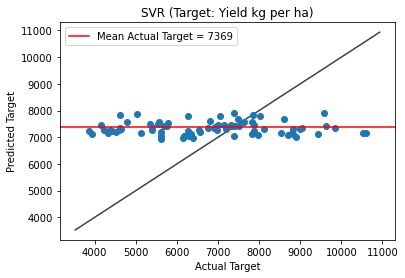

GBR
MAE on test data: 1760.1198479949567
RMSE on test data: 2082.0387021982465
R squared on test data: -0.5326516495379381
MAPE on test data: 29.04757853230854


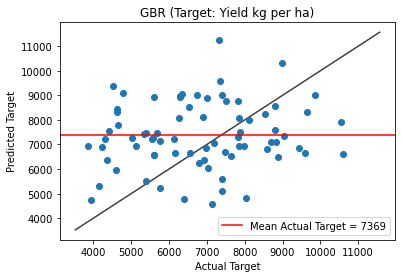

XGBoost
MAE on test data: 1654.8249315524108
RMSE on test data: 1915.7295595735118
R squared on test data: -0.29758035388590054
MAPE on test data: 27.53450023381625


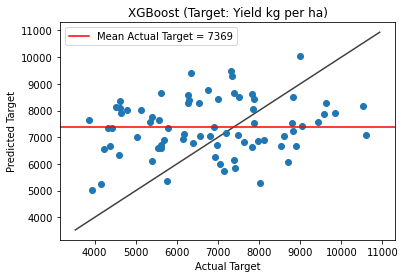

[20:29:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1087.4439383734011
RMSE on test data: 1317.3054557882115
R squared on test data: -0.01242759230238799
MAPE on test data: 16.536763677386915


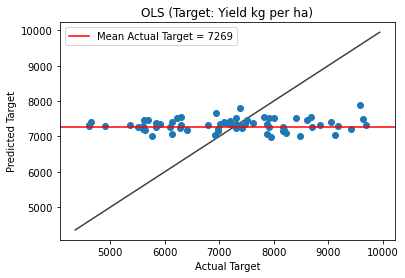

Lasso
MAE on test data: 1087.1417728694585
RMSE on test data: 1316.9682914763923
R squared on test data: -0.011909396972531683
MAPE on test data: 16.529864081710212


Ridge
MAE on test data: 1086.2446111806387
RMSE on test data: 1316.0806530070047
R squared on test data: -0.010545799964464253
MAPE on test data: 16.51150783513734


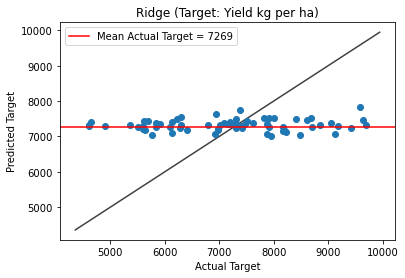

ElasticNet
MAE on test data: 1087.1795302827525
RMSE on test data: 1317.0097459615067
R squared on test data: -0.011973102140699021
MAPE on test data: 16.53072631966966


SVR
MAE on test data: 1069.7888022534069
RMSE on test data: 1305.4196556027882
R squared on test data: 0.0057598735581718685
MAPE on test data: 16.26216572370805


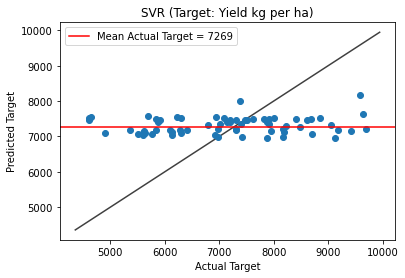

GBR
MAE on test data: 1219.0301918001444
RMSE on test data: 1523.6416533520958
R squared on test data: -0.35443031464212726
MAPE on test data: 18.534926815261063


XGBoost
MAE on test data: 1225.1349937159462
RMSE on test data: 1446.2480260024279
R squared on test data: -0.2203279268432492
MAPE on test data: 18.427586794309253


[20:29:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1234.2428857026166
RMSE on test data: 1482.0368732230745
R squared on test data: -0.042526245272936025
MAPE on test data: 17.92024970908518


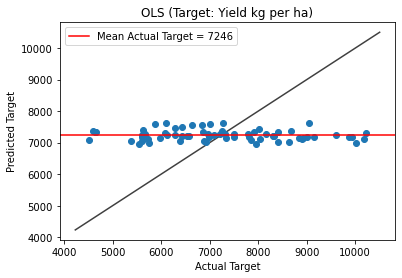

Lasso
MAE on test data: 1234.3112627102855
RMSE on test data: 1481.9485467442653
R squared on test data: -0.0424019839539338
MAPE on test data: 17.922316003221475


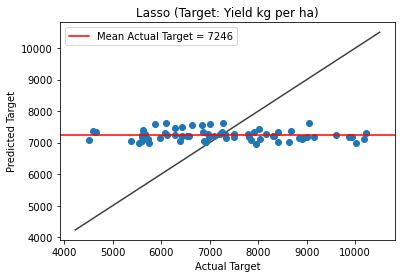

Ridge
MAE on test data: 1231.9063999040422
RMSE on test data: 1479.3725342012735
R squared on test data: -0.0387812013462665
MAPE on test data: 17.891516574237745


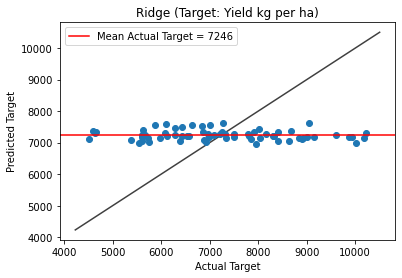

ElasticNet
MAE on test data: 1234.3219360507103
RMSE on test data: 1481.975998294974
R squared on test data: -0.042440603130046384
MAPE on test data: 17.92235643935157


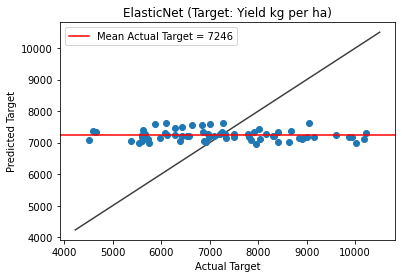

SVR
MAE on test data: 1211.457666875062
RMSE on test data: 1457.1795289734662
R squared on test data: -0.00784814737361339
MAPE on test data: 17.641242967769912


GBR
MAE on test data: 1355.5897413328998
RMSE on test data: 1631.3443897209545
R squared on test data: -0.26316558946521695
MAPE on test data: 19.511530478987407


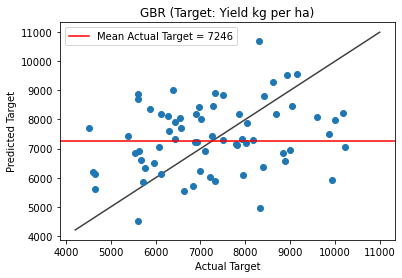

XGBoost
MAE on test data: 1316.4830315023996
RMSE on test data: 1598.3786087292435
R squared on test data: -0.21262996646607557
MAPE on test data: 19.098391149457317


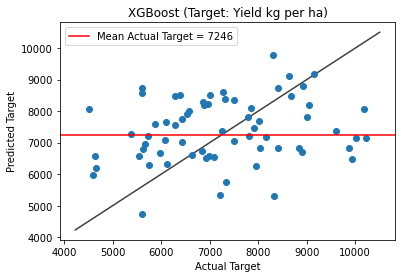

[20:29:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1252.1934593617175
RMSE on test data: 1456.1317345763528
R squared on test data: -0.02112367162701645
MAPE on test data: 17.503095966269345


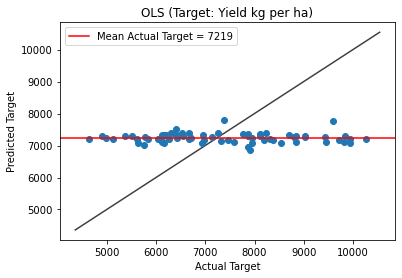

Lasso
MAE on test data: 1251.9499445708245
RMSE on test data: 1455.9804029592656
R squared on test data: -0.0209114377158095
MAPE on test data: 17.50061344777612


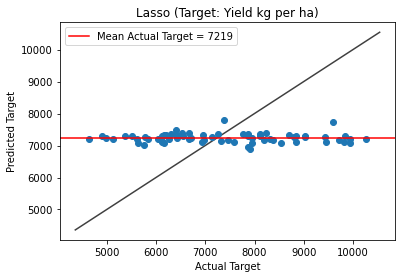

Ridge
MAE on test data: 1250.8527176003154
RMSE on test data: 1455.436671240206
R squared on test data: -0.020149067179373592
MAPE on test data: 17.48304810692939


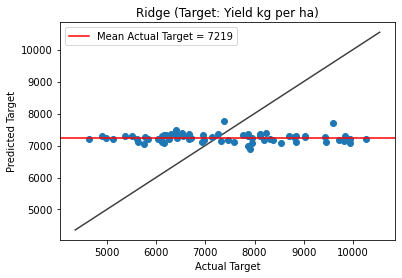

ElasticNet
MAE on test data: 1251.9803506897345
RMSE on test data: 1455.9987648643394
R squared on test data: -0.0209371880584317
MAPE on test data: 17.500923227064288


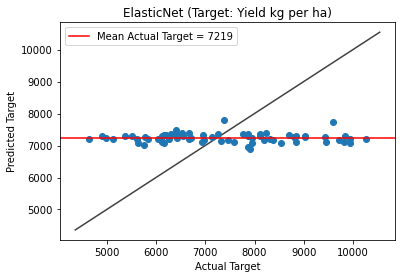

SVR
MAE on test data: 1225.8190057660115
RMSE on test data: 1431.4605410330728
R squared on test data: 0.013184931965406599
MAPE on test data: 17.2196902230714


GBR
MAE on test data: 1322.7157206427748
RMSE on test data: 1560.7862418176605
R squared on test data: -0.17317788202824902
MAPE on test data: 18.210352209794873


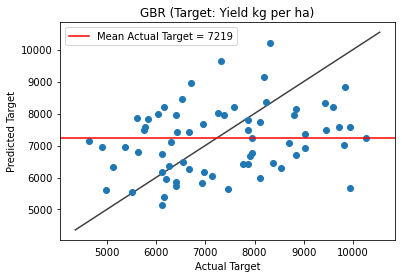

XGBoost
MAE on test data: 1297.7067647293538
RMSE on test data: 1588.4653408144864
R squared on test data: -0.21515729058722832
MAPE on test data: 18.102869239576926


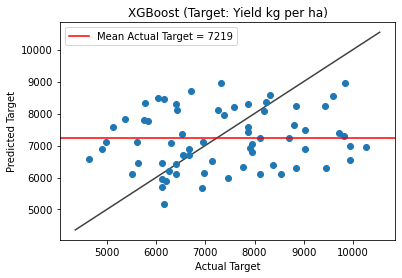

[20:30:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1096.266376126585
RMSE on test data: 1338.90464404924
R squared on test data: -0.018658623292992838
MAPE on test data: 16.652514255585054


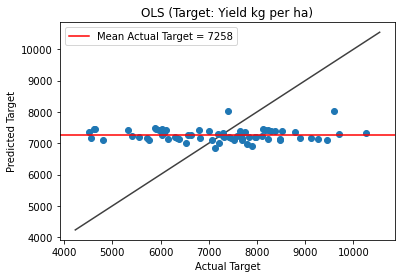

Lasso
MAE on test data: 1095.6614223741885
RMSE on test data: 1338.4222665520965
R squared on test data: -0.017924755525692282
MAPE on test data: 16.644067551093265


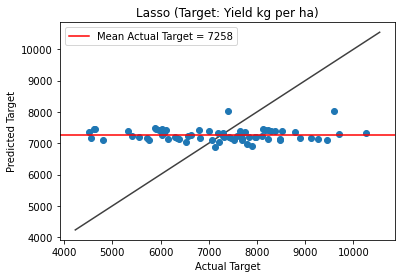

Ridge
MAE on test data: 1093.7278281517065
RMSE on test data: 1337.0699840592777
R squared on test data: -0.015868862595653788
MAPE on test data: 16.614392415558882


ElasticNet
MAE on test data: 1095.7370416390388
RMSE on test data: 1338.4817153808006
R squared on test data: -0.018015184054677613
MAPE on test data: 16.64512343359597


SVR
MAE on test data: 1138.665124043243
RMSE on test data: 1372.8254988521328
R squared on test data: -0.07092743498029397
MAPE on test data: 17.113477679741322


GBR
MAE on test data: 1249.670194523199
RMSE on test data: 1565.0056027013818
R squared on test data: -0.3917497867462014
MAPE on test data: 18.578902046065682


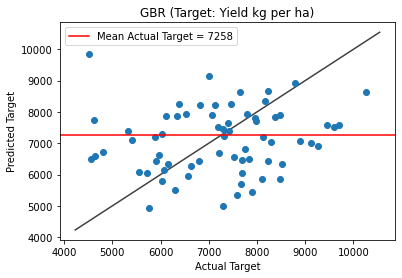

XGBoost
MAE on test data: 1304.8900334989921
RMSE on test data: 1615.6298841711032
R squared on test data: -0.48324579397472656
MAPE on test data: 19.435000797326577


r_2_all_data  r_2_90_percentile  r_2_80_percentile
0     -0.013581          -0.421149          -0.220328
1     -0.063510          -0.149765          -0.212630
2     -0.396430          -0.203297          -0.215157
3     -0.058652          -0.297580          -0.483246

None


In [24]:
#set each equal to a variable and collect
r_0_50 = build_models(df_summer_combined_parents, 0, 50)
r_0_60 = build_models(df_summer_combined_parents, 0, 60)
r_0_70 = build_models(df_summer_combined_parents, 0, 70)
r_0_80 = build_models(df_summer_combined_parents, 0, 80)
r_05_50 = build_models(df_summer_combined_parents, .05, 50)
r_05_60 = build_models(df_summer_combined_parents, .05, 60)
r_05_70 = build_models(df_summer_combined_parents, .05, 70)
r_05_80 = build_models(df_summer_combined_parents, .05, 80)
r_1_50 = build_models(df_summer_combined_parents, .1, 50)
r_1_60 = build_models(df_summer_combined_parents, .1, 60)
r_1_70 = build_models(df_summer_combined_parents, .1, 70)
r_1_80 = build_models(df_summer_combined_parents, .1, 80)

list0 = [r_0_50, r_0_60, r_0_70, r_0_80]
list05 = [r_05_50, r_05_60, r_05_70, r_05_80]
list1 = [r_1_50, r_1_60, r_1_70, r_1_80]

print(display(pd.DataFrame(data = {'r_2_all_data': list0, 'r_2_90_percentile': list05, 'r_2_80_percentile': list1})))

## Model Building Dataset 2: Winter Combined Parents

[16:59:38] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1534.9163007607435
RMSE on test data: 1855.3690396169688
R squared on test data: -0.09764851244814232
MAPE on test data: 25.97976878694916


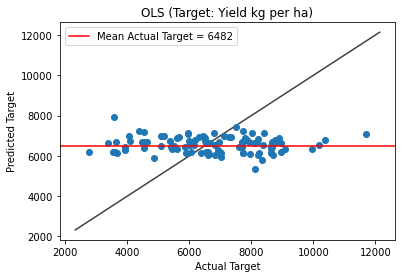

Lasso
MAE on test data: 1534.2834020204277
RMSE on test data: 1854.3032068831103
R squared on test data: -0.09638776738071253
MAPE on test data: 25.96910443422127


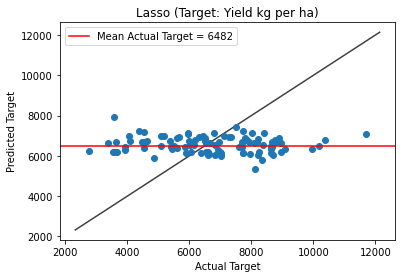

Ridge
MAE on test data: 1530.699143687276
RMSE on test data: 1849.9746422403875
R squared on test data: -0.09127506932690088
MAPE on test data: 25.91481521750486


ElasticNet
MAE on test data: 1534.3626073190414
RMSE on test data: 1854.4359655209494
R squared on test data: -0.09654476452820826
MAPE on test data: 25.970439336552197


SVR
MAE on test data: 1508.0219120828383
RMSE on test data: 1834.689946581414
R squared on test data: -0.0733170911722969
MAPE on test data: 25.862764694056285


GBR
MAE on test data: 1323.299023001762
RMSE on test data: 1724.6102695526831
R squared on test data: 0.05161512679903535
MAPE on test data: 20.517281725573795


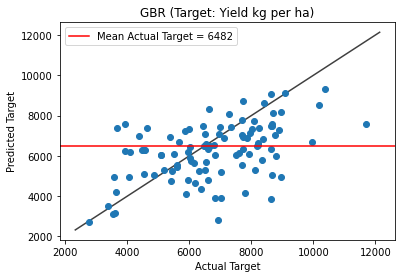

XGBoost
MAE on test data: 1307.1639851328382
RMSE on test data: 1670.8003813045516
R squared on test data: 0.10987332910766767
MAPE on test data: 21.21642431867022


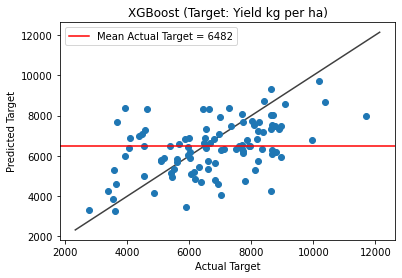

[17:00:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1726.8805526103185
RMSE on test data: 2144.2412978487464
R squared on test data: -0.12205224345120191
MAPE on test data: 33.693582651469725


Lasso
MAE on test data: 1725.8824990566143
RMSE on test data: 2142.948144504502
R squared on test data: -0.12069927251380408
MAPE on test data: 33.673834273484054


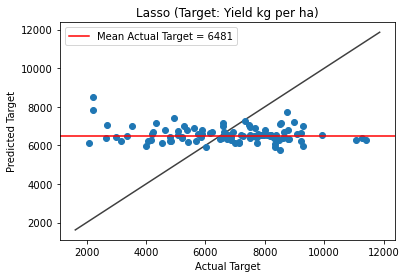

Ridge
MAE on test data: 1723.5675407423978
RMSE on test data: 2138.5143528987346
R squared on test data: -0.11606658307881879
MAPE on test data: 33.62052110776042


ElasticNet
MAE on test data: 1726.0072671373603
RMSE on test data: 2143.1094548207957
R squared on test data: -0.12086800002939913
MAPE on test data: 33.67630324848542


SVR
MAE on test data: 1664.6313827719614
RMSE on test data: 2110.318430720692
R squared on test data: -0.086830330271084
MAPE on test data: 33.370473917184576


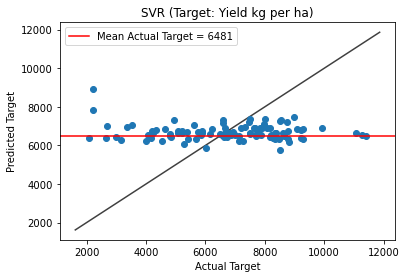

GBR
MAE on test data: 1551.0587469600116
RMSE on test data: 1985.8589939211163
R squared on test data: 0.03758455891320733
MAPE on test data: 27.1924997944648


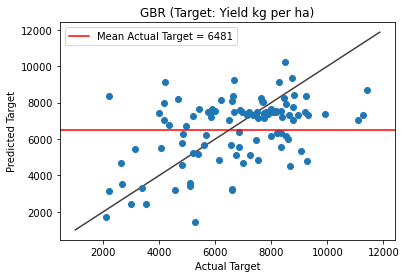

XGBoost
MAE on test data: 1505.965872896056
RMSE on test data: 1948.502871057969
R squared on test data: 0.07345212134881773
MAPE on test data: 27.157670086273335


[17:00:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1776.6031828067285
RMSE on test data: 2154.2484514316857
R squared on test data: 0.018532224462812108
MAPE on test data: 36.98998523249427


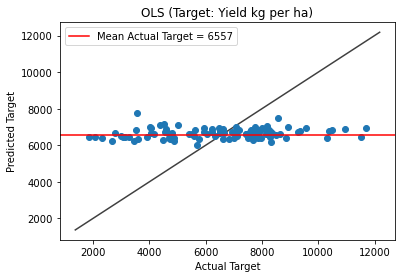

Lasso
MAE on test data: 1776.966268378298
RMSE on test data: 2154.3733714104205
R squared on test data: 0.018418394984732522
MAPE on test data: 37.00083970172813


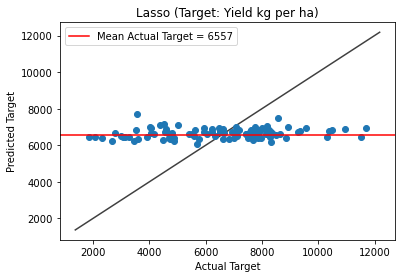

Ridge
MAE on test data: 1777.1798016167054
RMSE on test data: 2154.589800860322
R squared on test data: 0.018221164698932313
MAPE on test data: 37.01599157134762


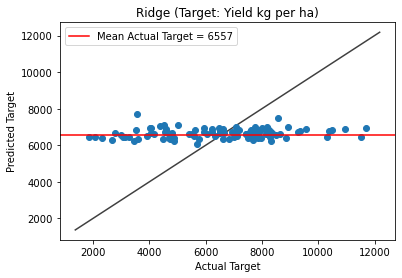

ElasticNet
MAE on test data: 1776.92091335974
RMSE on test data: 2154.3573996877253
R squared on test data: 0.018432949092476503
MAPE on test data: 36.999483577867395


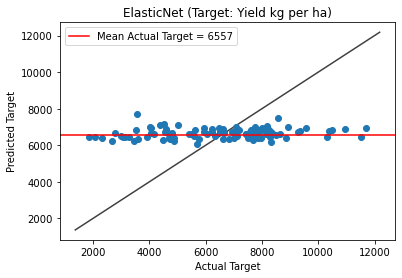

SVR
MAE on test data: 1770.8279702825246
RMSE on test data: 2165.325016747925
R squared on test data: 0.008413391101894652
MAPE on test data: 37.393200886473856


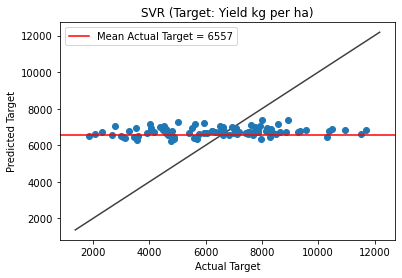

GBR
MAE on test data: 1462.569744700548
RMSE on test data: 1955.6696444698853
R squared on test data: 0.19113609508736862
MAPE on test data: 26.65547243674038


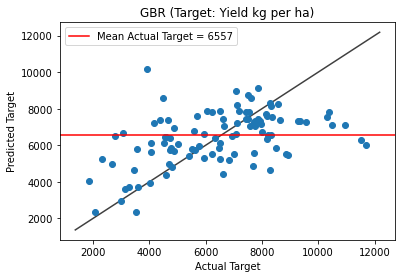

XGBoost
MAE on test data: 1428.3074852420432
RMSE on test data: 1865.691536321054
R squared on test data: 0.2638536740632582
MAPE on test data: 26.873878104484856


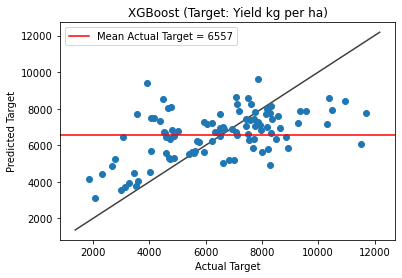

[17:00:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1684.9241722951679
RMSE on test data: 2044.57360740959
R squared on test data: 0.019674123082424333
MAPE on test data: 35.38886179096585


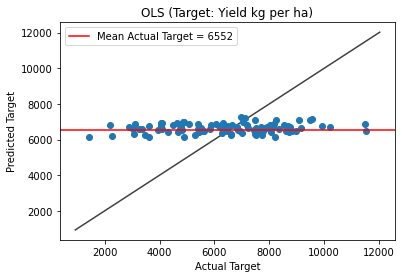

Lasso
MAE on test data: 1684.8712631133653
RMSE on test data: 2044.8833475465542
R squared on test data: 0.019377074083510748
MAPE on test data: 35.39903563684477


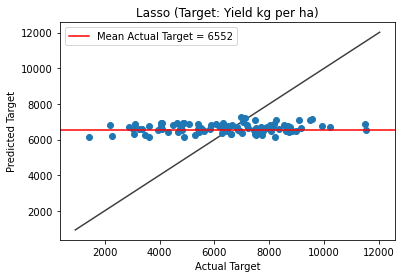

Ridge
MAE on test data: 1684.471099379703
RMSE on test data: 2045.2058809655202
R squared on test data: 0.019067708164289265
MAPE on test data: 35.40207722171218


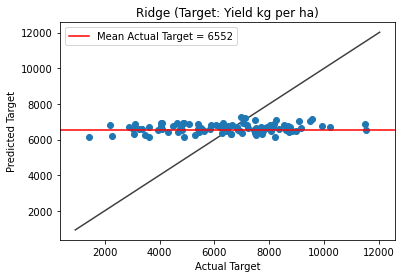

ElasticNet
MAE on test data: 1684.8778695160006
RMSE on test data: 2044.8442807073634
R squared on test data: 0.019414542697308246
MAPE on test data: 35.39776414902251


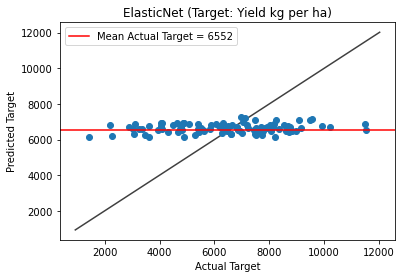

SVR
MAE on test data: 1663.9961289795413
RMSE on test data: 2041.8626536649685
R squared on test data: 0.02227207914973861
MAPE on test data: 35.02830683459313


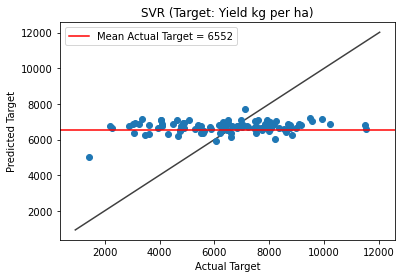

GBR
MAE on test data: 1252.2737816534832
RMSE on test data: 1706.0390500741976
R squared on test data: 0.3174367508454713
MAPE on test data: 23.612726405583604


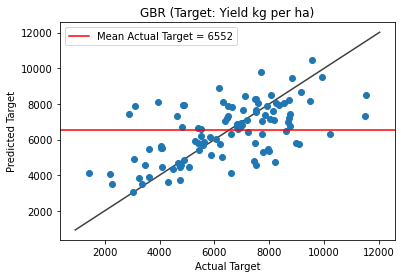

XGBoost
MAE on test data: 1261.0968483983459
RMSE on test data: 1646.8366311663729
R squared on test data: 0.36398698482580105
MAPE on test data: 25.298911450902352


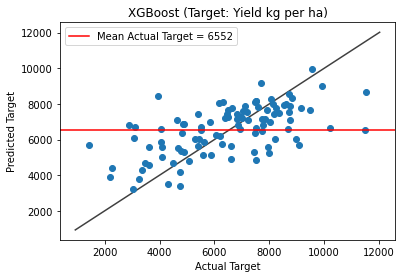

[17:01:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1518.2552839499351
RMSE on test data: 1839.1739226075115
R squared on test data: -0.10838748883181593
MAPE on test data: 30.4400246608002


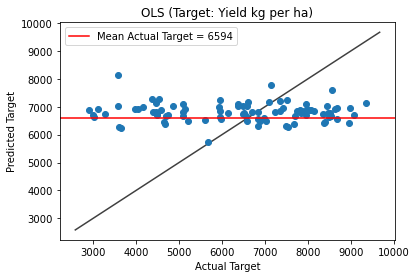

Lasso
MAE on test data: 1518.2257539212703
RMSE on test data: 1839.1228014278256
R squared on test data: -0.10832587281192807
MAPE on test data: 30.43938265581997


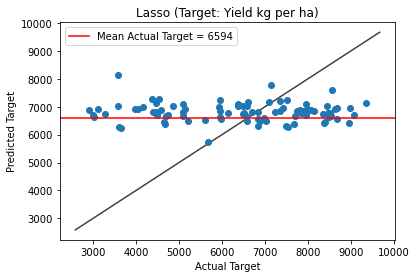

Ridge
MAE on test data: 1516.1175049215265
RMSE on test data: 1835.2939371540022
R squared on test data: -0.1037158359669248
MAPE on test data: 30.392249926318687


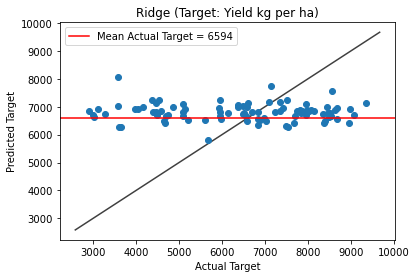

ElasticNet
MAE on test data: 1518.206945186716
RMSE on test data: 1839.0898939662943
R squared on test data: -0.10828621057219445
MAPE on test data: 30.438971777887268


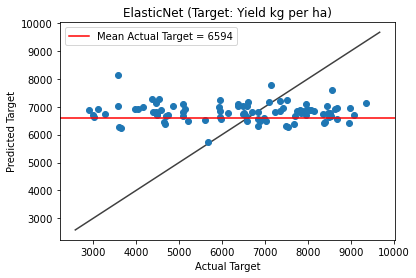

SVR
MAE on test data: 1505.5013928886312
RMSE on test data: 1831.4003031232126
R squared on test data: -0.09903766769324807
MAPE on test data: 30.419838950834


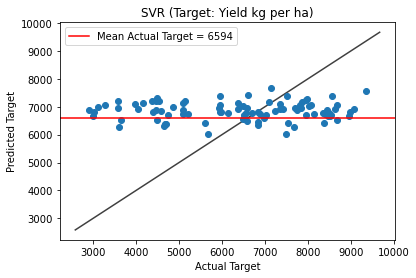

GBR
MAE on test data: 1211.5499704271058
RMSE on test data: 1674.4330414935991
R squared on test data: 0.08128335555924104
MAPE on test data: 22.347250449589005


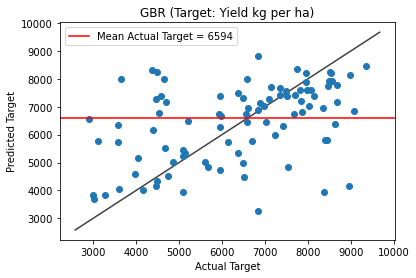

XGBoost
MAE on test data: 1281.3297994338716
RMSE on test data: 1658.9686475111116
R squared on test data: 0.09817479150531128
MAPE on test data: 24.103440033708836


[17:01:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1478.0661526824183
RMSE on test data: 1757.4102470810083
R squared on test data: -0.0672436286031477
MAPE on test data: 26.237599746527078


Lasso
MAE on test data: 1477.352977843808
RMSE on test data: 1756.4509687175614
R squared on test data: -0.06607884160120059
MAPE on test data: 26.22614863010377


Ridge
MAE on test data: 1475.1200863491647
RMSE on test data: 1754.0403968685243
R squared on test data: -0.06315465386251051
MAPE on test data: 26.198389338330898


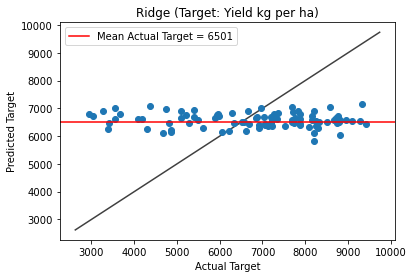

ElasticNet
MAE on test data: 1477.442024750171
RMSE on test data: 1756.5705225830675
R squared on test data: -0.06622397310367689
MAPE on test data: 26.227578172872263


SVR
MAE on test data: 1478.5571629051426
RMSE on test data: 1775.7290100823004
R squared on test data: -0.08960889942250239
MAPE on test data: 26.43242147586657


GBR
MAE on test data: 1397.3747335642327
RMSE on test data: 1898.553810002225
R squared on test data: -0.24555549906231544
MAPE on test data: 22.58748784358168


XGBoost
MAE on test data: 1261.9011985154468
RMSE on test data: 1724.3852599766162
R squared on test data: -0.02750954700645547
MAPE on test data: 20.27991798408704


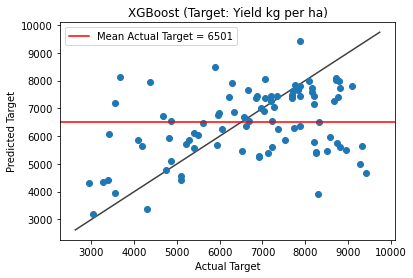

[17:01:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1390.4283177600778
RMSE on test data: 1651.3415075131743
R squared on test data: -0.0011519755063327253
MAPE on test data: 25.49264220911709


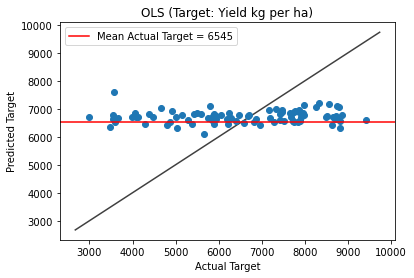

Lasso
MAE on test data: 1391.2967685478866
RMSE on test data: 1651.5467507481176
R squared on test data: -0.0014008549035953166
MAPE on test data: 25.504926785511344


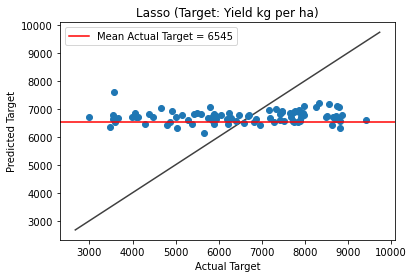

Ridge
MAE on test data: 1392.0854083841061
RMSE on test data: 1651.3198795243884
R squared on test data: -0.0011257510557216577
MAPE on test data: 25.514157509882434


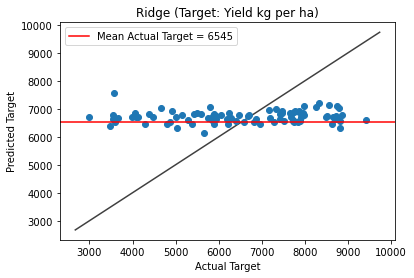

ElasticNet
MAE on test data: 1391.1882145171087
RMSE on test data: 1651.5206803587714
R squared on test data: -0.00136924005029182
MAPE on test data: 25.503391744395437


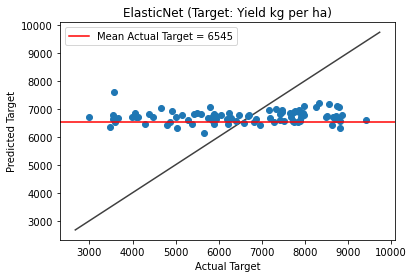

SVR
MAE on test data: 1392.555371420648
RMSE on test data: 1647.3867650887844
R squared on test data: 0.0036375331174649528
MAPE on test data: 25.562354416962783


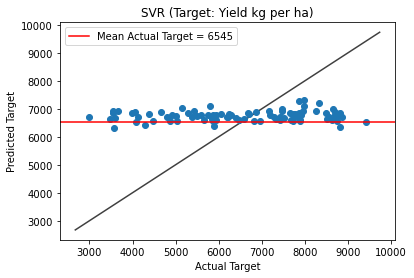

GBR
MAE on test data: 1212.4387715392693
RMSE on test data: 1638.5340440450727
R squared on test data: 0.014317258519728093
MAPE on test data: 20.205145996687392


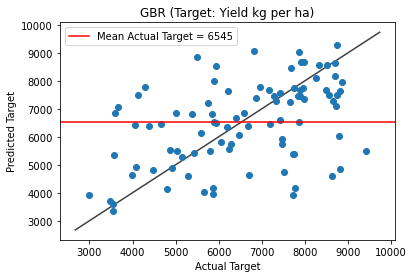

XGBoost
MAE on test data: 1251.8189196384606
RMSE on test data: 1673.1187770187696
R squared on test data: -0.02773171920780082
MAPE on test data: 21.916629818848886


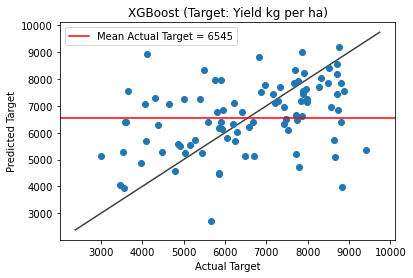

[17:02:20] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1377.7091868870796
RMSE on test data: 1663.1593324442135
R squared on test data: 0.01191160065422614
MAPE on test data: 25.01643990092367


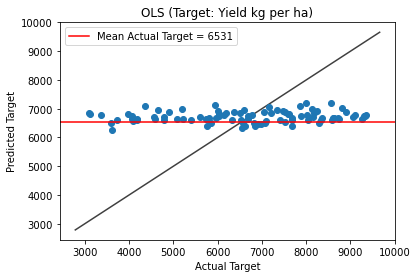

Lasso
MAE on test data: 1377.701618357638
RMSE on test data: 1663.2216971441317
R squared on test data: 0.011837497120481655
MAPE on test data: 25.014905832722413


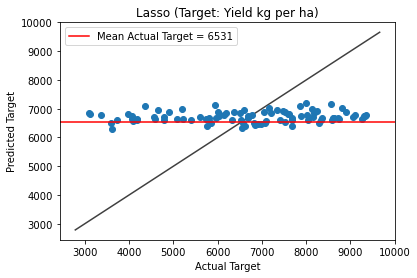

Ridge
MAE on test data: 1377.6117147957157
RMSE on test data: 1663.2152455927485
R squared on test data: 0.011845163168620276
MAPE on test data: 25.009553123111296


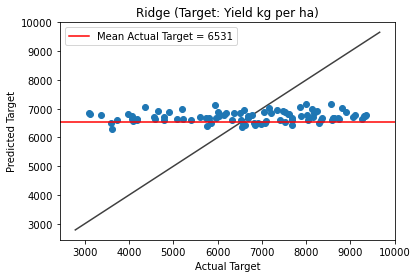

ElasticNet
MAE on test data: 1377.7025536990059
RMSE on test data: 1663.2136577778747
R squared on test data: 0.011847049883166205
MAPE on test data: 25.015097609758975


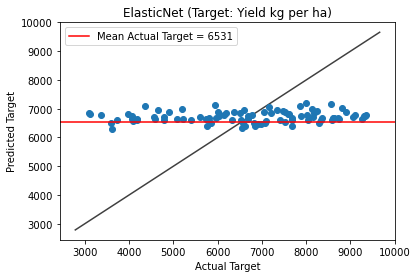

SVR
MAE on test data: 1368.82162818892
RMSE on test data: 1677.8715370022896
R squared on test data: -0.005646855575714538
MAPE on test data: 25.162437659700444


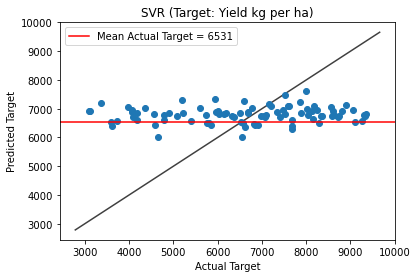

GBR
MAE on test data: 1200.4191518922248
RMSE on test data: 1597.1477909256562
R squared on test data: 0.08879037905440512
MAPE on test data: 20.6804845117071


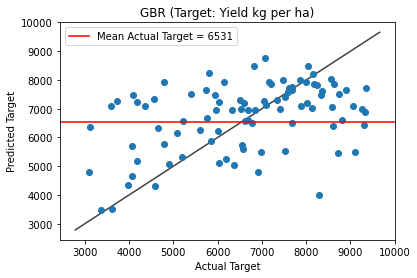

XGBoost
MAE on test data: 1184.5750908778382
RMSE on test data: 1491.6207955960783
R squared on test data: 0.20522363190648185
MAPE on test data: 20.165215675536743


[17:02:44] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1251.4503474503538
RMSE on test data: 1521.2996840085264
R squared on test data: -0.057376056119610386
MAPE on test data: 22.17596535038668


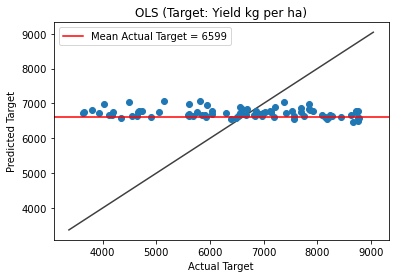

Lasso
MAE on test data: 1251.3164850764463
RMSE on test data: 1520.873817603725
R squared on test data: -0.05678414393218989
MAPE on test data: 22.173721107755135


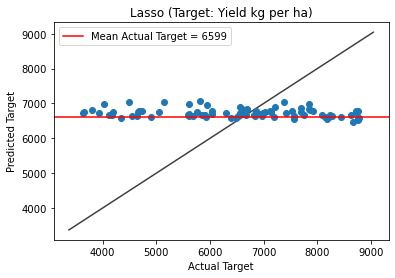

Ridge
MAE on test data: 1250.7876224014947
RMSE on test data: 1520.115385484809
R squared on test data: -0.05573040866270662
MAPE on test data: 22.166577294659483


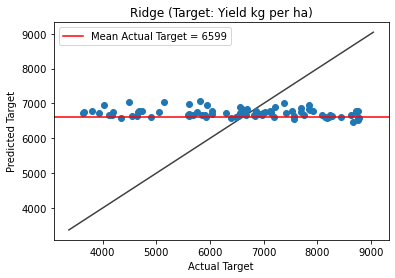

ElasticNet
MAE on test data: 1251.3331952221968
RMSE on test data: 1520.926809687708
R squared on test data: -0.05685778866075153
MAPE on test data: 22.174001508743416


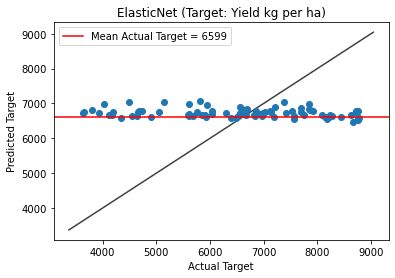

SVR
MAE on test data: 1268.6042953293268
RMSE on test data: 1556.0053459691253
R squared on test data: -0.10617054809489712
MAPE on test data: 22.54256526208553


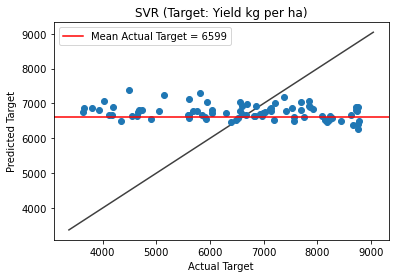

GBR
MAE on test data: 1256.3914599974673
RMSE on test data: 1668.943297491751
R squared on test data: -0.27257411482728977
MAPE on test data: 22.037761072960663


XGBoost
MAE on test data: 1195.9118820012613
RMSE on test data: 1594.6073880543915
R squared on test data: -0.16173604794651797
MAPE on test data: 21.22458401434311


[17:03:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1315.9867348502119
RMSE on test data: 1543.5595430225114
R squared on test data: -0.13636579637164492
MAPE on test data: 23.400838384866546


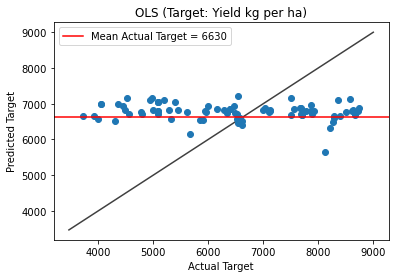

Lasso
MAE on test data: 1315.6993169235182
RMSE on test data: 1542.9413107889109
R squared on test data: -0.13545569572008453
MAPE on test data: 23.394819655367534


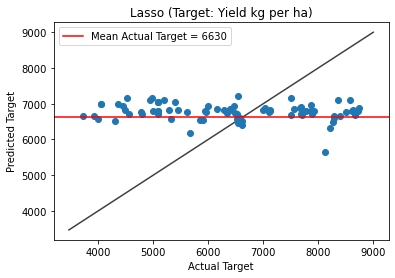

Ridge
MAE on test data: 1313.5113208857272
RMSE on test data: 1539.423596364264
R squared on test data: -0.13028420189647427
MAPE on test data: 23.359512744260115


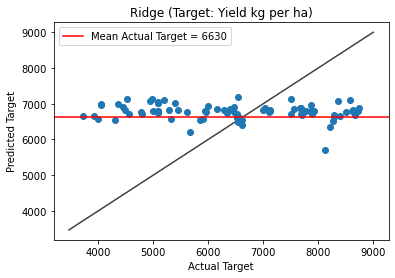

ElasticNet
MAE on test data: 1315.7352277205619
RMSE on test data: 1543.0182176556168
R squared on test data: -0.13556889058438948
MAPE on test data: 23.395572255261182


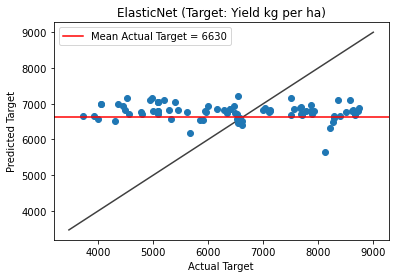

SVR
MAE on test data: 1323.6518812252505
RMSE on test data: 1563.1829643156366
R squared on test data: -0.16544291488126395
MAPE on test data: 23.615205267745836


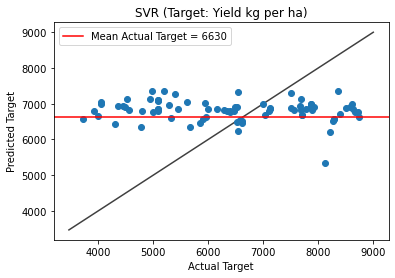

GBR
MAE on test data: 1180.6390356218194
RMSE on test data: 1502.729649321336
R squared on test data: -0.0770431170117003
MAPE on test data: 20.24735099596625


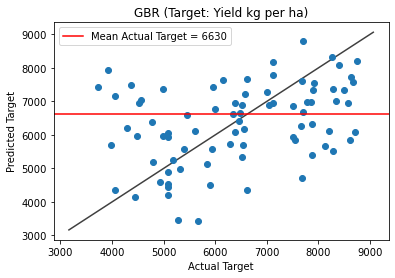

XGBoost
MAE on test data: 1122.3109477747626
RMSE on test data: 1422.235103379328
R squared on test data: 0.03525137918729415
MAPE on test data: 19.21434394328584


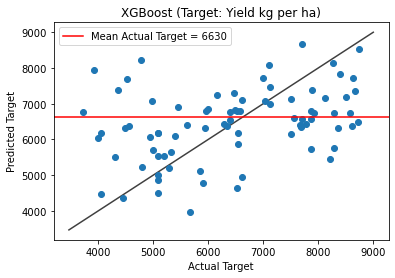

[17:03:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1161.238638616062
RMSE on test data: 1392.9725794410804
R squared on test data: -0.06676762429946015
MAPE on test data: 20.398420964222886


Lasso
MAE on test data: 1161.1940603622809
RMSE on test data: 1392.7447246117588
R squared on test data: -0.06641866082570846
MAPE on test data: 20.399265880473557


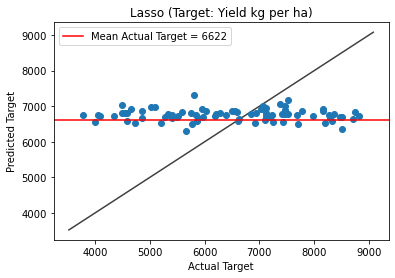

Ridge
MAE on test data: 1161.2853370551315
RMSE on test data: 1392.045745488401
R squared on test data: -0.06534851879776049
MAPE on test data: 20.404571717542076


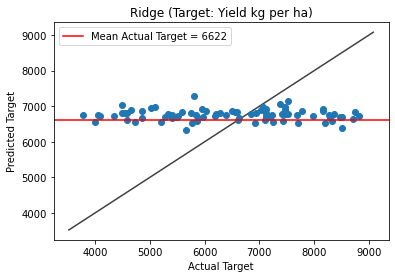

ElasticNet
MAE on test data: 1161.2031438550136
RMSE on test data: 1392.7872170403964
R squared on test data: -0.06648373435901944
MAPE on test data: 20.39911640682289


SVR
MAE on test data: 1156.3301508499885
RMSE on test data: 1407.6605168524882
R squared on test data: -0.0893828914176491
MAPE on test data: 20.500143571712314


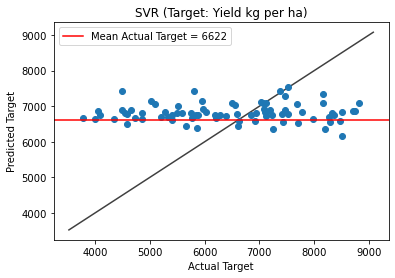

GBR
MAE on test data: 1275.1047292241742
RMSE on test data: 1609.2110838618396
R squared on test data: -0.42367455219290284
MAPE on test data: 21.555840717525083


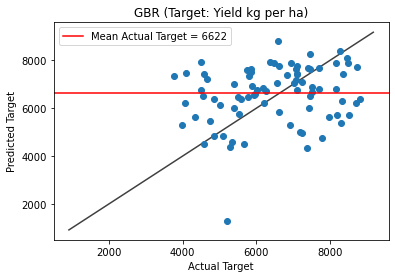

XGBoost
MAE on test data: 1114.6774409631512
RMSE on test data: 1427.9594702556506
R squared on test data: -0.12102798375502677
MAPE on test data: 18.964690281069647


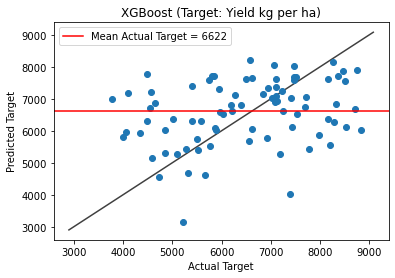

[17:03:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1117.1348859793743
RMSE on test data: 1380.1516465365537
R squared on test data: -0.04351658453080143
MAPE on test data: 18.452797185410684


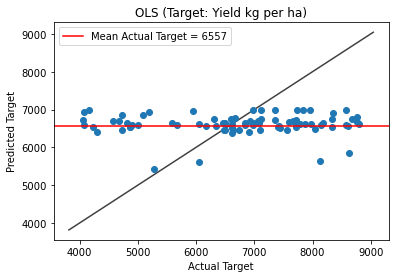

Lasso
MAE on test data: 1116.960071947116
RMSE on test data: 1380.1828604487202
R squared on test data: -0.04356378601540212
MAPE on test data: 18.450582332200327


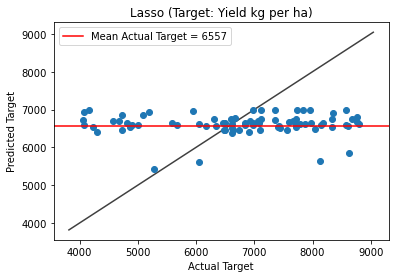

Ridge
MAE on test data: 1115.0051142414977
RMSE on test data: 1377.2833930719144
R squared on test data: -0.03918378538775125
MAPE on test data: 18.42571961436348


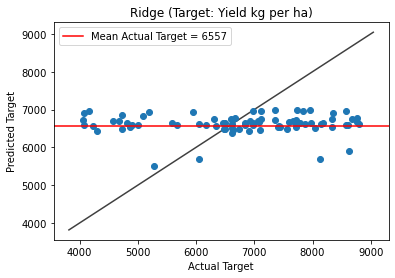

ElasticNet
MAE on test data: 1116.9818797449968
RMSE on test data: 1380.1783816965933
R squared on test data: -0.043557013208585404
MAPE on test data: 18.45085887774724


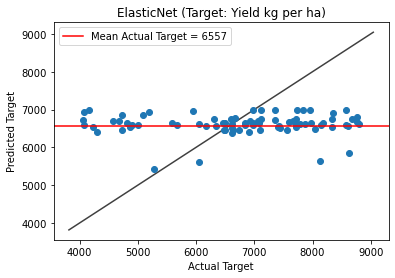

SVR
MAE on test data: 1150.4104227280022
RMSE on test data: 1406.9267833140543
R squared on test data: -0.08439806625256785
MAPE on test data: 18.92080080078972


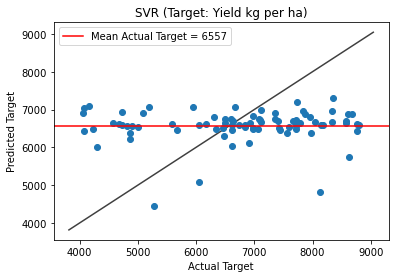

GBR
MAE on test data: 1269.794905540016
RMSE on test data: 1569.006162208964
R squared on test data: -0.3486369006991519
MAPE on test data: 19.321563643333477


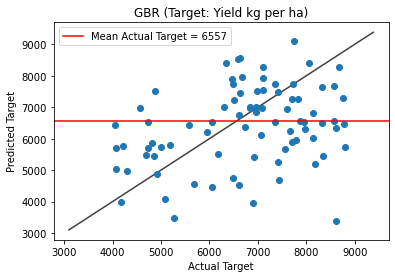

XGBoost
MAE on test data: 1150.9722626511298
RMSE on test data: 1388.060042123104
R squared on test data: -0.05550973888265753
MAPE on test data: 17.705475064747965


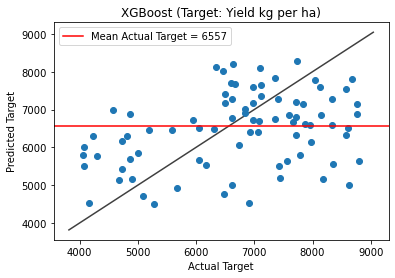

r_2_all_data  r_2_90_percentile  r_2_80_percentile
0      0.109873           0.098175          -0.161736
1      0.073452          -0.027510           0.035251
2      0.263854          -0.027732          -0.121028
3      0.363987           0.205224          -0.055510

None


In [10]:
r_0_50 = build_models(df_winter_combined_parents, 0, 50)
r_0_60 = build_models(df_winter_combined_parents, 0, 60)
r_0_70 = build_models(df_winter_combined_parents, 0, 70)
r_0_80 = build_models(df_winter_combined_parents, 0, 80)
r_05_50 = build_models(df_winter_combined_parents, .05, 50)
r_05_60 = build_models(df_winter_combined_parents, .05, 60)
r_05_70 = build_models(df_winter_combined_parents, .05, 70)
r_05_80 = build_models(df_winter_combined_parents, .05, 80)
r_1_50 = build_models(df_winter_combined_parents, .1, 50)
r_1_60 = build_models(df_winter_combined_parents, .1, 60)
r_1_70 = build_models(df_winter_combined_parents, .1, 70)
r_1_80 = build_models(df_winter_combined_parents, .1, 80)

list0 = [r_0_50, r_0_60, r_0_70, r_0_80]
list05 = [r_05_50, r_05_60, r_05_70, r_05_80]
list1 = [r_1_50, r_1_60, r_1_70, r_1_80]

print(display(pd.DataFrame(data = {'r_2_all_data': list0, 'r_2_90_percentile': list05, 'r_2_80_percentile': list1})))

## Model Building Dataset 3: Summer Acceptable DY/WY Ratio Combined Parents

[17:04:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1521.1837469327916
RMSE on test data: 1988.6719370177834
R squared on test data: -0.01618970679931553
MAPE on test data: 23.830600335737984


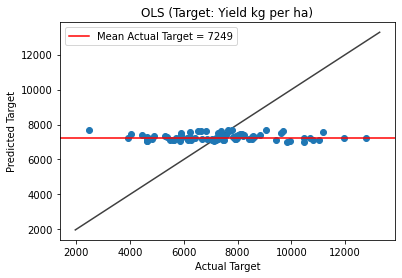

Lasso
MAE on test data: 1520.995385705875
RMSE on test data: 1987.8573729108273
R squared on test data: -0.015357410510297154
MAPE on test data: 23.82801652752861


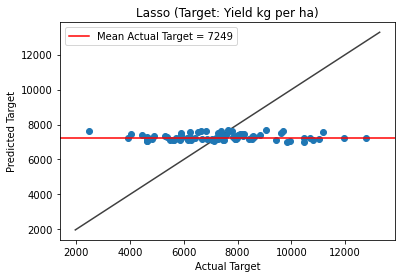

Ridge
MAE on test data: 1520.5078700946135
RMSE on test data: 1987.0290034961413
R squared on test data: -0.014511358084405401
MAPE on test data: 23.814752713796242


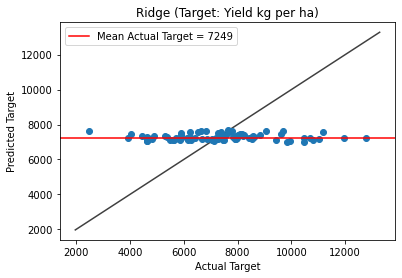

ElasticNet
MAE on test data: 1521.0189557942165
RMSE on test data: 1987.9585900574307
R squared on test data: -0.015460812492473552
MAPE on test data: 23.828339755340178


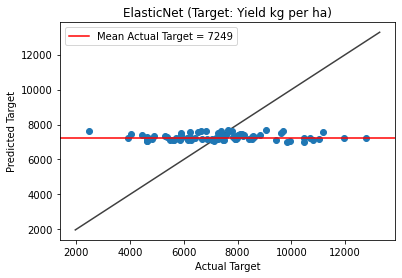

SVR
MAE on test data: 1552.4738569797742
RMSE on test data: 1964.3792454294805
R squared on test data: 0.00848525988635862
MAPE on test data: 24.425199380349348


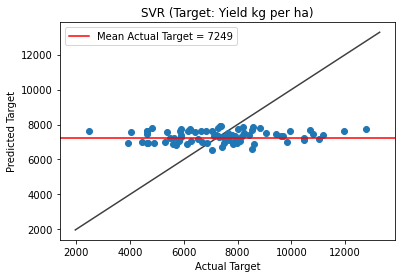

GBR
MAE on test data: 1743.679211209427
RMSE on test data: 2316.064808746578
R squared on test data: -0.37831955106389925
MAPE on test data: 25.39906081525555


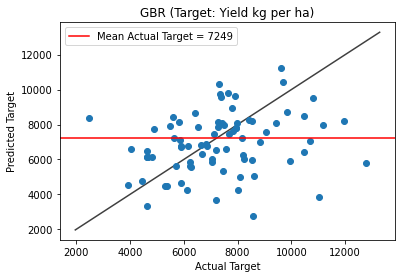

XGBoost
MAE on test data: 1527.512097209307
RMSE on test data: 2032.7664635736437
R squared on test data: -0.06175294747454263
MAPE on test data: 22.428556082095437


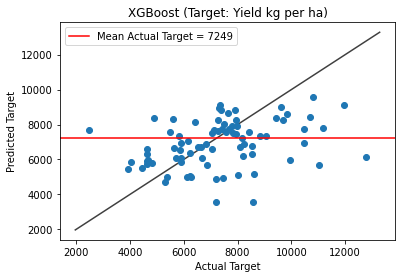

[17:04:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1769.403284622153
RMSE on test data: 2199.7231541064793
R squared on test data: -0.07337152284900617
MAPE on test data: 35.292018911535976


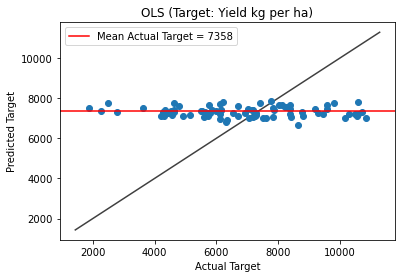

Lasso
MAE on test data: 1768.7581174641368
RMSE on test data: 2199.0293414860334
R squared on test data: -0.07269452741703608
MAPE on test data: 35.27862076318767


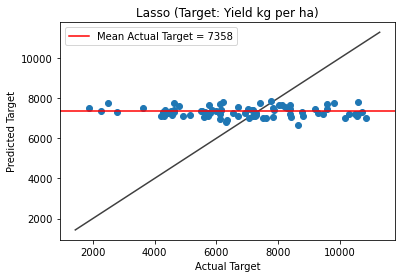

Ridge
MAE on test data: 1768.6578092974337
RMSE on test data: 2198.6088384266145
R squared on test data: -0.07228432079115521
MAPE on test data: 35.28174200051311


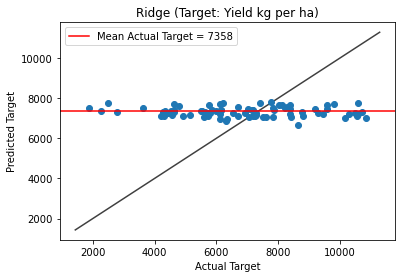

ElasticNet
MAE on test data: 1768.8387563291217
RMSE on test data: 2199.1157397957327
R squared on test data: -0.072778819893621
MAPE on test data: 35.280295391991906


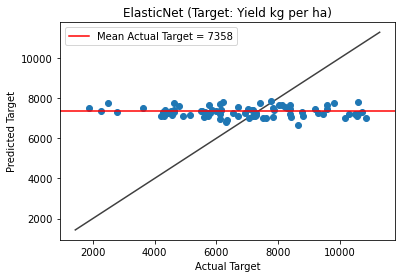

SVR
MAE on test data: 1791.1773010369332
RMSE on test data: 2234.1439373040926
R squared on test data: -0.10722610323053305
MAPE on test data: 35.76497584771023


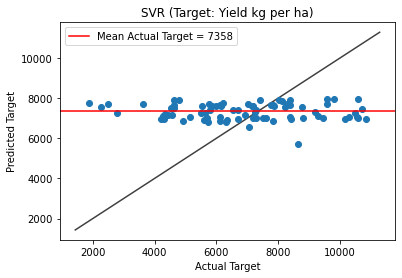

GBR
MAE on test data: 1781.108220134846
RMSE on test data: 2128.6903938260207
R squared on test data: -0.005168840446799772
MAPE on test data: 32.42460238867852


XGBoost
MAE on test data: 1847.0881279560854
RMSE on test data: 2139.2971799981515
R squared on test data: -0.015210858013110506
MAPE on test data: 34.23599541263162


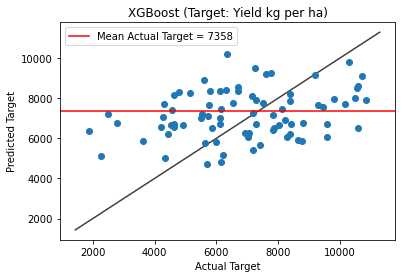

[17:05:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1661.6031771333583
RMSE on test data: 2073.0242821144398
R squared on test data: -0.03486923904246764
MAPE on test data: 24.667710743969415


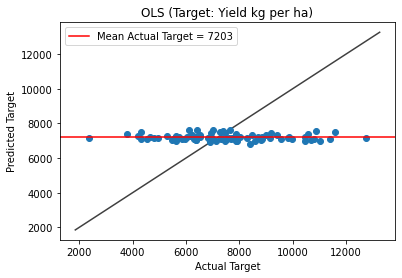

Lasso
MAE on test data: 1660.6559180680597
RMSE on test data: 2072.3076040407964
R squared on test data: -0.034153820611751984
MAPE on test data: 24.652082617827666


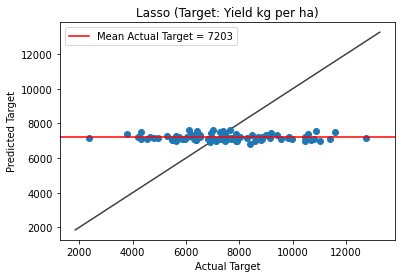

Ridge
MAE on test data: 1659.5857167370536
RMSE on test data: 2071.5154137654367
R squared on test data: -0.03336331054481878
MAPE on test data: 24.641318302746157


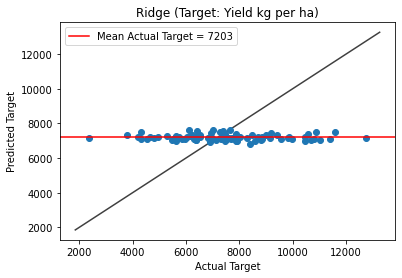

ElasticNet
MAE on test data: 1660.774343984363
RMSE on test data: 2072.396927093702
R squared on test data: -0.03424297317486791
MAPE on test data: 24.654036561798286


SVR
MAE on test data: 1633.6277908941343
RMSE on test data: 2053.4930481478286
R squared on test data: -0.01546082468764931
MAPE on test data: 24.371355661074716


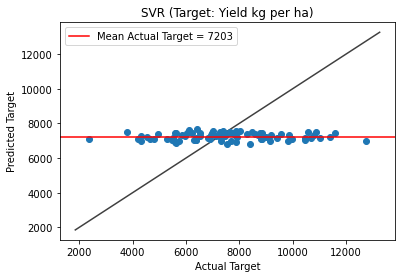

GBR
MAE on test data: 1821.8805508622638
RMSE on test data: 2302.212765163078
R squared on test data: -0.27634362894673736
MAPE on test data: 27.01032924108079


XGBoost
MAE on test data: 1744.3449751639935
RMSE on test data: 2220.369451383464
R squared on test data: -0.18720901750406949
MAPE on test data: 26.403111342758827


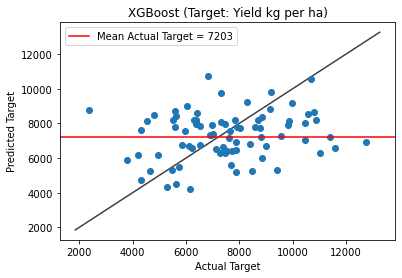

[17:05:25] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1782.776487219992
RMSE on test data: 2198.9874037313703
R squared on test data: 0.0026606687715420296
MAPE on test data: 31.690371442244043


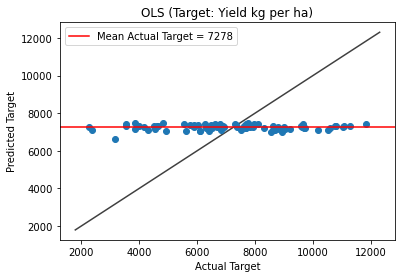

Lasso
MAE on test data: 1782.635820746246
RMSE on test data: 2198.8823696601703
R squared on test data: 0.002755941812543239
MAPE on test data: 31.692498932481072


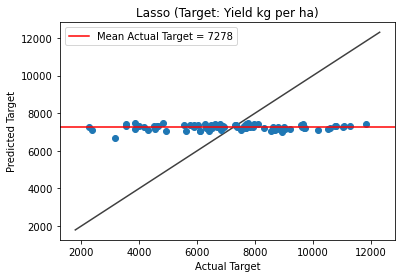

Ridge
MAE on test data: 1782.725066255552
RMSE on test data: 2199.057109615643
R squared on test data: 0.0025974382848625854
MAPE on test data: 31.69380018313942


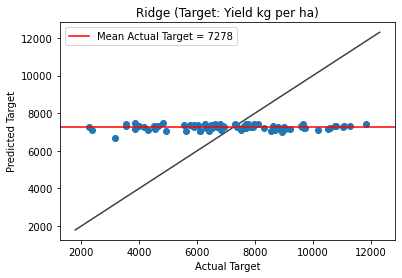

ElasticNet
MAE on test data: 1782.6534025028327
RMSE on test data: 2198.8951735525466
R squared on test data: 0.0027443280555319305
MAPE on test data: 31.692232962678546


SVR
MAE on test data: 1789.191955139154
RMSE on test data: 2213.47116762179
R squared on test data: -0.010520670558249234
MAPE on test data: 31.8352238885867


GBR
MAE on test data: 1743.9372116452291
RMSE on test data: 2211.8747377172936
R squared on test data: -0.009063553171814398
MAPE on test data: 30.007486519035055


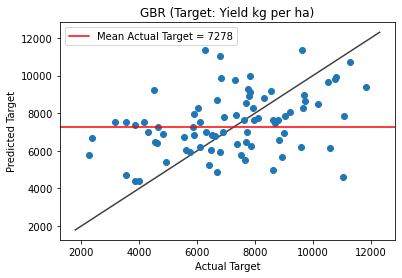

XGBoost
MAE on test data: 1787.0929937641238
RMSE on test data: 2213.2972228891954
R squared on test data: -0.010361854085914946
MAPE on test data: 31.61423520109348


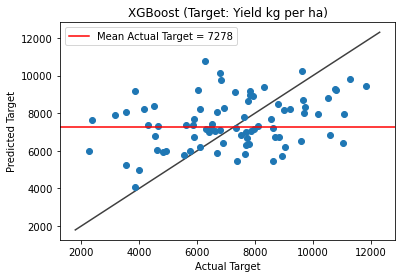

[17:05:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1562.4108576340525
RMSE on test data: 1887.0149236225984
R squared on test data: -0.010070452546455
MAPE on test data: 23.656499474284693


Lasso
MAE on test data: 1562.4953651223307
RMSE on test data: 1886.855459623569
R squared on test data: -0.009899745822341321
MAPE on test data: 23.656693731489252


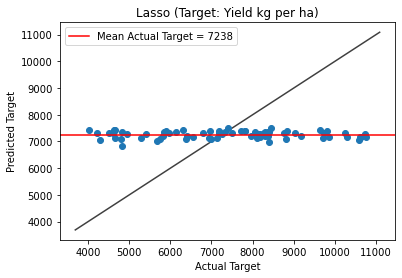

Ridge
MAE on test data: 1561.9882162052297
RMSE on test data: 1886.4520890683382
R squared on test data: -0.009468000744937255
MAPE on test data: 23.647005027197128


ElasticNet
MAE on test data: 1562.4848030964433
RMSE on test data: 1886.8751955018238
R squared on test data: -0.009920872361280475
MAPE on test data: 23.65666947537943


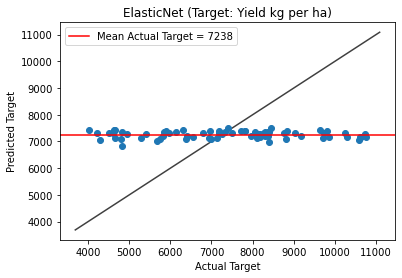

SVR
MAE on test data: 1556.7868682444216
RMSE on test data: 1899.0787628683288
R squared on test data: -0.02302666005323717
MAPE on test data: 23.603906589753322


GBR
MAE on test data: 1455.416561295967
RMSE on test data: 1790.4307261221725
R squared on test data: 0.0906814685443782
MAPE on test data: 21.953819439708123


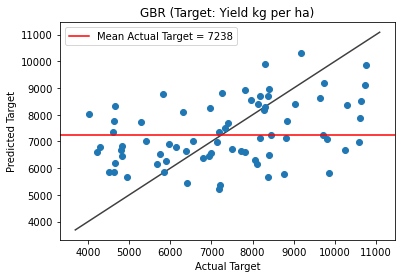

XGBoost
MAE on test data: 1470.973011158607
RMSE on test data: 1811.3929154613136
R squared on test data: 0.06926439731718204
MAPE on test data: 22.091388286569487


[17:06:11] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1332.7713255976912
RMSE on test data: 1619.9652331151071
R squared on test data: -0.016796395291186927
MAPE on test data: 20.682126071185237


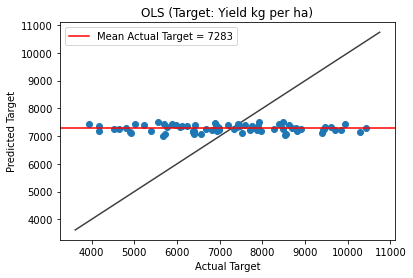

Lasso
MAE on test data: 1332.7924904845104
RMSE on test data: 1619.8793158179126
R squared on test data: -0.016688543493321495
MAPE on test data: 20.682717612759426


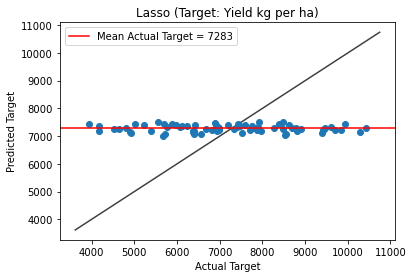

Ridge
MAE on test data: 1332.4835294282177
RMSE on test data: 1619.0793618505227
R squared on test data: -0.015684637576613314
MAPE on test data: 20.67515062083092


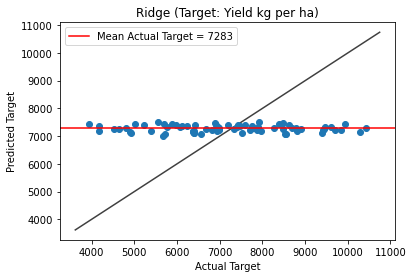

ElasticNet
MAE on test data: 1332.7898482110463
RMSE on test data: 1619.8898460394664
R squared on test data: -0.016701761750147703
MAPE on test data: 20.68264376955614


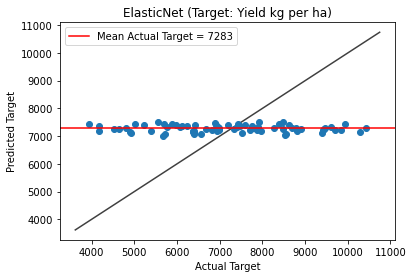

SVR
MAE on test data: 1328.0796129975733
RMSE on test data: 1618.624156996849
R squared on test data: -0.015113597523196187
MAPE on test data: 20.638639358236034


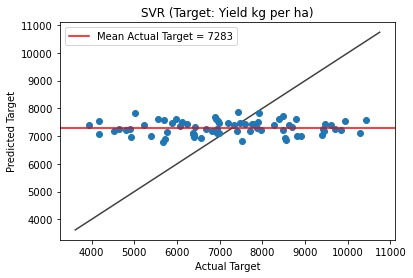

GBR
MAE on test data: 1672.080076961331
RMSE on test data: 2067.371399985915
R squared on test data: -0.6559972747615499
MAPE on test data: 25.27847457540171


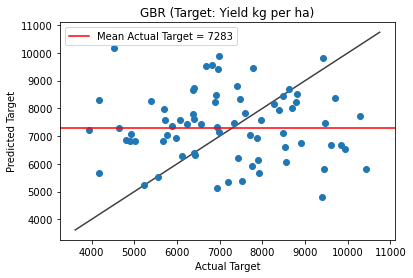

XGBoost
MAE on test data: 1533.8102541917774
RMSE on test data: 1943.6048736760715
R squared on test data: -0.4636544876524704
MAPE on test data: 22.99517302367574


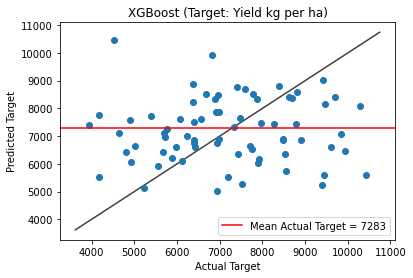

[17:06:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1443.4117981009545
RMSE on test data: 1795.3692590816781
R squared on test data: -0.06925315120437436
MAPE on test data: 22.246253003072


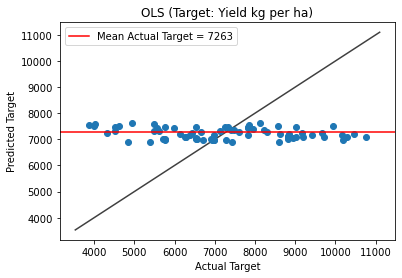

Lasso
MAE on test data: 1443.2485851279175
RMSE on test data: 1794.566036409846
R squared on test data: -0.06829662791496371
MAPE on test data: 22.242218943500017


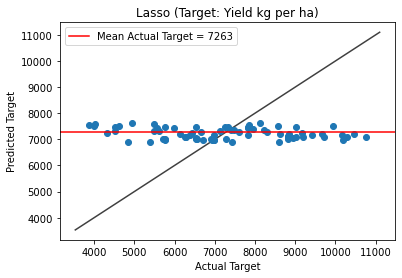

Ridge
MAE on test data: 1442.4761522841027
RMSE on test data: 1791.9462959650498
R squared on test data: -0.06517986647079277
MAPE on test data: 22.227260220013218


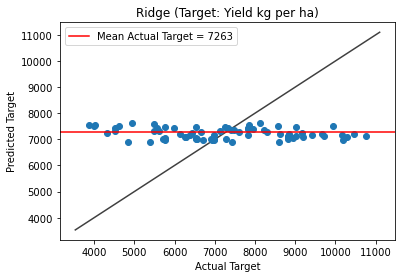

ElasticNet
MAE on test data: 1443.269004568599
RMSE on test data: 1794.666256118977
R squared on test data: -0.06841595187932348
MAPE on test data: 22.242723545540187


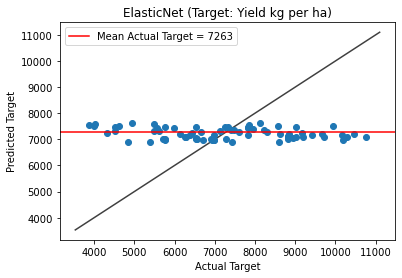

SVR
MAE on test data: 1432.2592245127025
RMSE on test data: 1788.2172675867207
R squared on test data: -0.06075121476761791
MAPE on test data: 22.138368800158418


GBR
MAE on test data: 1531.405370590804
RMSE on test data: 1973.739557379336
R squared on test data: -0.29226820726975045
MAPE on test data: 23.565354047181053


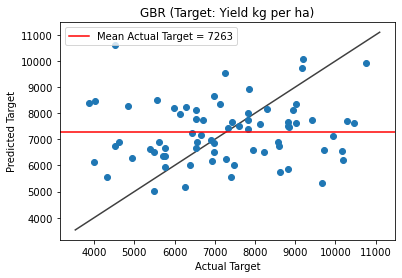

XGBoost
MAE on test data: 1465.1007939280144
RMSE on test data: 1825.6531145106126
R squared on test data: -0.10562918475796401
MAPE on test data: 22.185467689999918


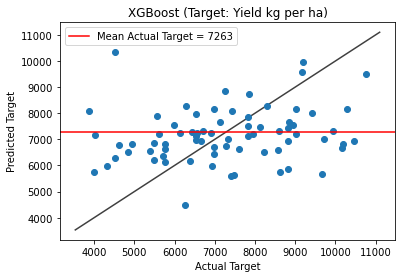

[17:06:56] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1494.4446896549812
RMSE on test data: 1811.6127717673119
R squared on test data: 0.00741150081527886
MAPE on test data: 23.05185864409084


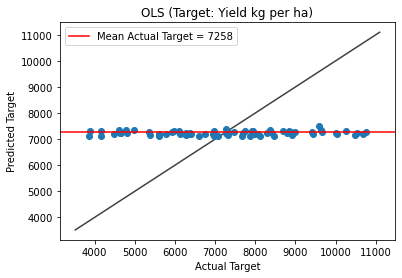

Lasso
MAE on test data: 1494.7399060025034
RMSE on test data: 1811.8152598117838
R squared on test data: 0.0071896007053882105
MAPE on test data: 23.056125000795763


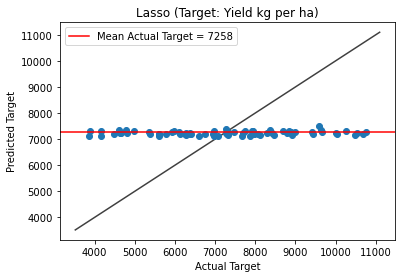

Ridge
MAE on test data: 1494.5049431806192
RMSE on test data: 1811.6759614890814
R squared on test data: 0.007342255901636063
MAPE on test data: 23.052162434261522


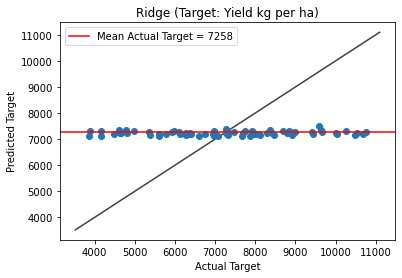

ElasticNet
MAE on test data: 1494.7030100172278
RMSE on test data: 1811.7897336961973
R squared on test data: 0.007217575317422842
MAPE on test data: 23.05559182752673


SVR
MAE on test data: 1467.1529196322106
RMSE on test data: 1791.1242210211128
R squared on test data: 0.029736029043064383
MAPE on test data: 22.59666240753883


GBR
MAE on test data: 1601.6771883541383
RMSE on test data: 1940.4036558103965
R squared on test data: -0.13873497485563502
MAPE on test data: 25.085016775893916


XGBoost
MAE on test data: 1580.5630330044726
RMSE on test data: 1888.190763104027
R squared on test data: -0.07827671986632545
MAPE on test data: 24.757420926631138


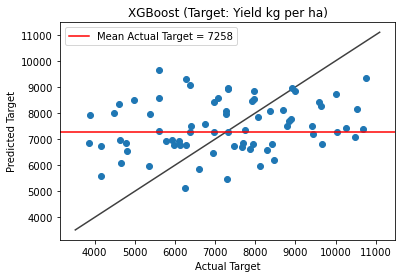

[17:07:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1081.5529790155113
RMSE on test data: 1312.3499829060215
R squared on test data: -0.034059908271997674
MAPE on test data: 15.43296640338613


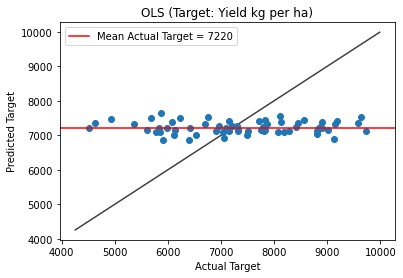

Lasso
MAE on test data: 1081.5892093153209
RMSE on test data: 1312.1026115742256
R squared on test data: -0.03367011489096594
MAPE on test data: 15.432709484888601


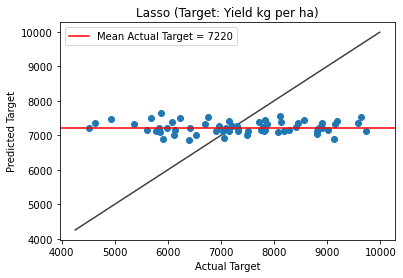

Ridge
MAE on test data: 1081.61894439864
RMSE on test data: 1311.3495908166137
R squared on test data: -0.03248400080210301
MAPE on test data: 15.427164744390911


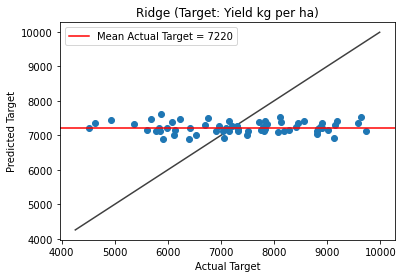

ElasticNet
MAE on test data: 1081.5846777665647
RMSE on test data: 1312.1332475488653
R squared on test data: -0.033718385294278175
MAPE on test data: 15.432741547650256


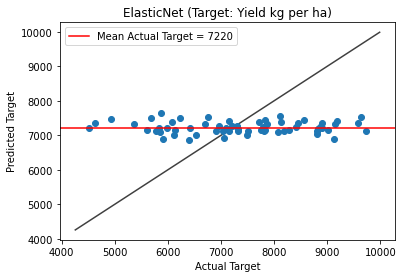

SVR
MAE on test data: 1101.753794372211
RMSE on test data: 1326.660836680572
R squared on test data: -0.05673521004023052
MAPE on test data: 15.680859415604399


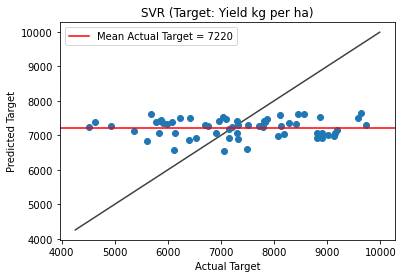

GBR
MAE on test data: 1269.4596108908604
RMSE on test data: 1594.1221036915588
R squared on test data: -0.5257716031034134
MAPE on test data: 18.669341519470663


XGBoost
MAE on test data: 1160.7044640413374
RMSE on test data: 1460.2275983032516
R squared on test data: -0.2802284236529158
MAPE on test data: 17.21477079396076


[17:07:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1047.9882268257834
RMSE on test data: 1289.0300338995787
R squared on test data: 0.0035929343633811506
MAPE on test data: 15.35818261691424


Lasso
MAE on test data: 1047.7559252812148
RMSE on test data: 1289.0996496129412
R squared on test data: 0.00348530698475058
MAPE on test data: 15.355288192311969


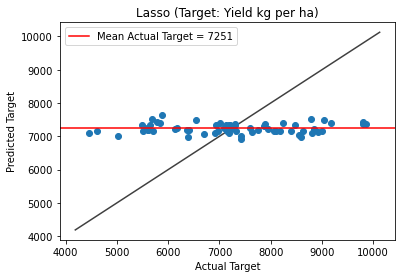

Ridge
MAE on test data: 1047.029566029198
RMSE on test data: 1288.971511293128
R squared on test data: 0.0036834070650695327
MAPE on test data: 15.345357594365227


ElasticNet
MAE on test data: 1047.7849640947302
RMSE on test data: 1289.0906188623646
R squared on test data: 0.003499269045975417
MAPE on test data: 15.355650053098502


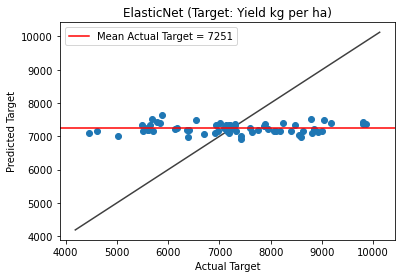

SVR
MAE on test data: 1083.259687152663
RMSE on test data: 1336.9197657247316
R squared on test data: -0.07181890786568634
MAPE on test data: 16.00713033809502


GBR
MAE on test data: 1323.7905364179828
RMSE on test data: 1599.735787404463
R squared on test data: -0.5346425896978528
MAPE on test data: 19.421996071475593


XGBoost
MAE on test data: 1242.9780870163972
RMSE on test data: 1480.4736854328714
R squared on test data: -0.31435327221575404
MAPE on test data: 18.148533512759542


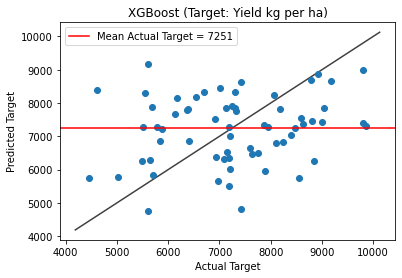

[17:08:01] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1333.3209951598024
RMSE on test data: 1556.598744472867
R squared on test data: 0.007343308282738437
MAPE on test data: 19.992795364492395


Lasso
MAE on test data: 1333.3531064306412
RMSE on test data: 1556.276193691273
R squared on test data: 0.007754652593031208
MAPE on test data: 19.992453229762802


Ridge
MAE on test data: 1334.0280922178063
RMSE on test data: 1556.454028907268
R squared on test data: 0.0075278724775373895
MAPE on test data: 20.001872184397957


ElasticNet
MAE on test data: 1333.3490907552964
RMSE on test data: 1556.316136361105
R squared on test data: 0.007703718912923652
MAPE on test data: 19.99249598355219


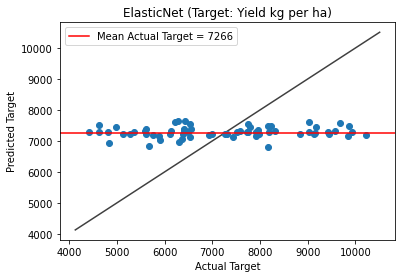

SVR
MAE on test data: 1337.9355957987684
RMSE on test data: 1564.8028275211786
R squared on test data: -0.003147897741994088
MAPE on test data: 19.925429785808593


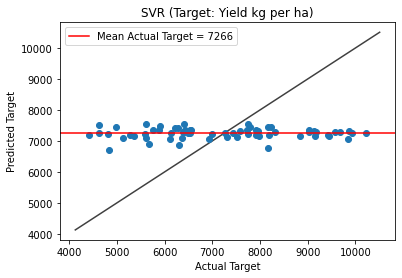

GBR
MAE on test data: 1220.2613575217974
RMSE on test data: 1577.3378976923864
R squared on test data: -0.019283980926496858
MAPE on test data: 18.69254491175807


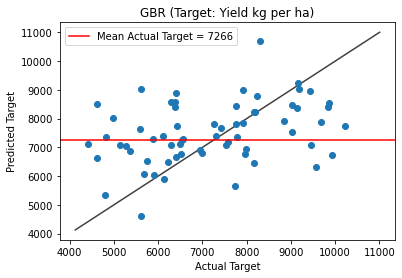

XGBoost
MAE on test data: 1209.2578897279175
RMSE on test data: 1548.127174960594
R squared on test data: 0.018118695088250147
MAPE on test data: 18.321610655847692


[17:08:23] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1297.8807441553854
RMSE on test data: 1519.9037136897678
R squared on test data: -0.052821199659376594
MAPE on test data: 20.729596923525996


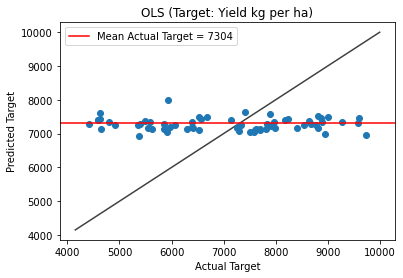

Lasso
MAE on test data: 1297.1663391080501
RMSE on test data: 1519.272611052989
R squared on test data: -0.051947064958131506
MAPE on test data: 20.71915333352988


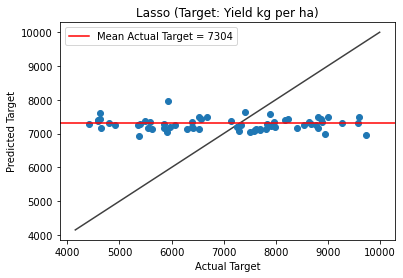

Ridge
MAE on test data: 1295.5503156878283
RMSE on test data: 1517.9369055722484
R squared on test data: -0.05009818834477886
MAPE on test data: 20.69548260077696


ElasticNet
MAE on test data: 1297.2556620747278
RMSE on test data: 1519.3508718526186
R squared on test data: -0.052055443583886696
MAPE on test data: 20.720459071745704


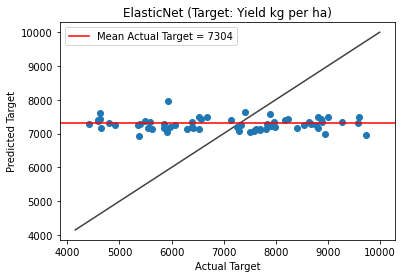

SVR
MAE on test data: 1296.947638714986
RMSE on test data: 1539.7107450733226
R squared on test data: -0.08044023866220984
MAPE on test data: 20.72976483036888


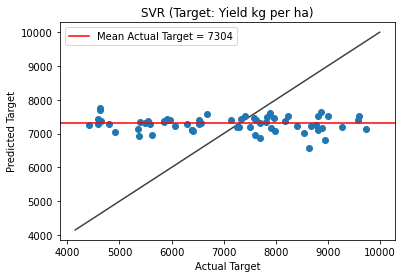

GBR
MAE on test data: 1504.84152504649
RMSE on test data: 1812.3957853831514
R squared on test data: -0.4970232874551419
MAPE on test data: 23.01139858255302


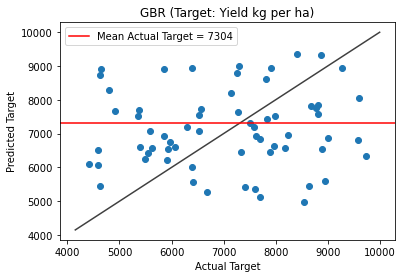

XGBoost
MAE on test data: 1405.8256127097775
RMSE on test data: 1701.5821037001763
R squared on test data: -0.31955740307924496
MAPE on test data: 21.83444609795838


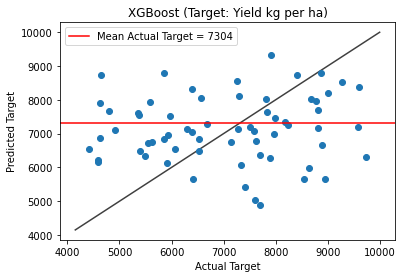

r_2_all_data  r_2_90_percentile  r_2_80_percentile
0     -0.061753           0.069264          -0.280228
1     -0.015211          -0.463654          -0.314353
2     -0.187209          -0.105629           0.018119
3     -0.010362          -0.078277          -0.319557

None


In [11]:
r_0_50 = build_models(df_dy_wy_ratio_summer_combined_parents, 0, 50)
r_0_60 = build_models(df_dy_wy_ratio_summer_combined_parents, 0, 60)
r_0_70 = build_models(df_dy_wy_ratio_summer_combined_parents, 0, 70)
r_0_80 = build_models(df_dy_wy_ratio_summer_combined_parents, 0, 80)
r_05_50 = build_models(df_dy_wy_ratio_summer_combined_parents, .05, 50)
r_05_60 = build_models(df_dy_wy_ratio_summer_combined_parents, .05, 60)
r_05_70 = build_models(df_dy_wy_ratio_summer_combined_parents, .05, 70)
r_05_80 = build_models(df_dy_wy_ratio_summer_combined_parents, .05, 80)
r_1_50 = build_models(df_dy_wy_ratio_summer_combined_parents, .1, 50)
r_1_60 = build_models(df_dy_wy_ratio_summer_combined_parents, .1, 60)
r_1_70 = build_models(df_dy_wy_ratio_summer_combined_parents, .1, 70)
r_1_80 = build_models(df_dy_wy_ratio_summer_combined_parents, .1, 80)

list0 = [r_0_50, r_0_60, r_0_70, r_0_80]
list05 = [r_05_50, r_05_60, r_05_70, r_05_80]
list1 = [r_1_50, r_1_60, r_1_70, r_1_80]

print(display(pd.DataFrame(data = {'r_2_all_data': list0, 'r_2_90_percentile': list05, 'r_2_80_percentile': list1})))

## Model Building Dataset 4: Winter Acceptable DY/WY Ratio Combined Parents

[17:08:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1363.4393655244417
RMSE on test data: 1709.8932643957446
R squared on test data: -0.0273270816063782
MAPE on test data: 24.481376068301078


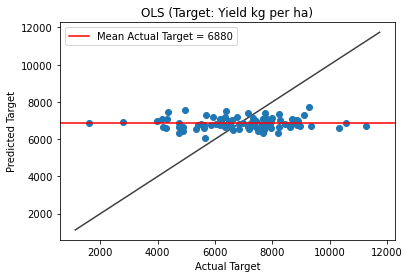

Lasso
MAE on test data: 1363.432888999492
RMSE on test data: 1709.7120245312299
R squared on test data: -0.027109310407168685
MAPE on test data: 24.48212624752167


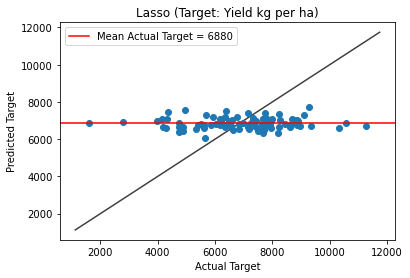

Ridge
MAE on test data: 1362.5280875504593
RMSE on test data: 1708.1946683783701
R squared on test data: -0.02528701631870911
MAPE on test data: 24.46970098343863


ElasticNet
MAE on test data: 1363.4336798631944
RMSE on test data: 1709.7342964119096
R squared on test data: -0.027136070241193577
MAPE on test data: 24.482032200837974


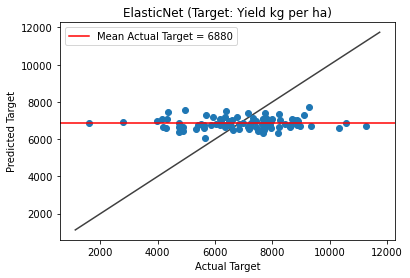

SVR
MAE on test data: 1342.512919134997
RMSE on test data: 1695.117791914949
R squared on test data: -0.009649183044847298
MAPE on test data: 24.135111972966282


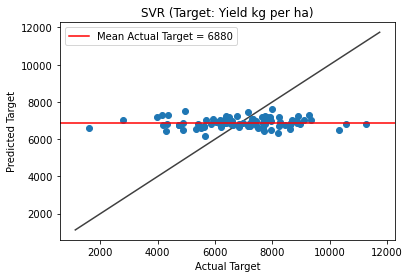

GBR
MAE on test data: 1408.9682191836341
RMSE on test data: 1847.6442238053905
R squared on test data: -0.1995198273599541
MAPE on test data: 24.240061082402146


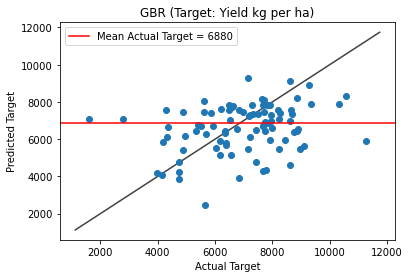

XGBoost
MAE on test data: 1387.4617857321311
RMSE on test data: 1766.3668664376462
R squared on test data: -0.09630792347624584
MAPE on test data: 23.86537136520804


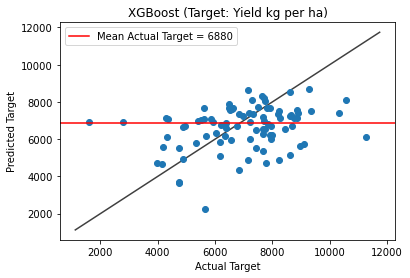

[17:09:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1573.4203258027749
RMSE on test data: 1867.1069058402227
R squared on test data: 0.00048534746788797545
MAPE on test data: 24.081426753508932


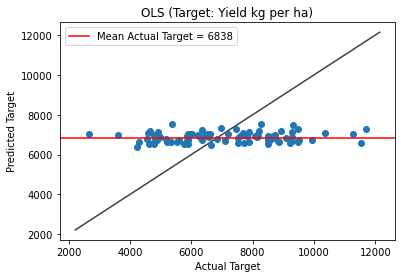

Lasso
MAE on test data: 1573.5290198899413
RMSE on test data: 1867.0549106562855
R squared on test data: 0.0005410156510159414
MAPE on test data: 24.084229820137438


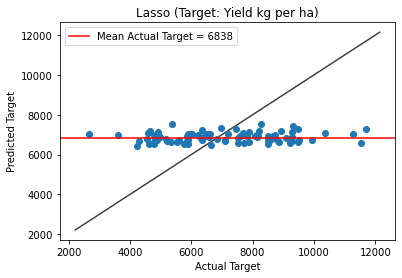

Ridge
MAE on test data: 1573.942586328887
RMSE on test data: 1867.0984965737246
R squared on test data: 0.0004943508796664275
MAPE on test data: 24.091445037128402


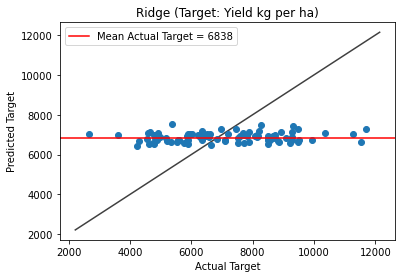

ElasticNet
MAE on test data: 1573.5022855519521
RMSE on test data: 1867.0581148749768
R squared on test data: 0.0005375851274802557
MAPE on test data: 24.083712894386558


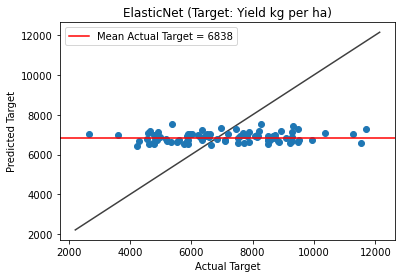

SVR
MAE on test data: 1550.1500348221482
RMSE on test data: 1860.2923570991438
R squared on test data: 0.007768070802549709
MAPE on test data: 23.938297909013404


GBR
MAE on test data: 1612.979408391201
RMSE on test data: 1996.5635161815944
R squared on test data: -0.14292322052324025
MAPE on test data: 24.173663140566166


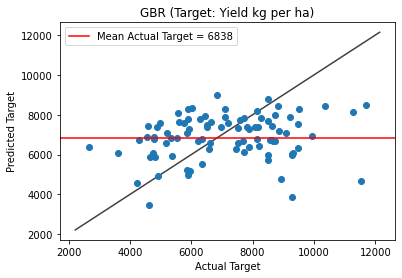

XGBoost
MAE on test data: 1511.0206975315252
RMSE on test data: 1855.3004592496281
R squared on test data: 0.013086025077008512
MAPE on test data: 22.41038789950679


[17:09:31] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1388.8352047949188
RMSE on test data: 1754.5417631099845
R squared on test data: 0.004884514474801316
MAPE on test data: 22.272029122276383


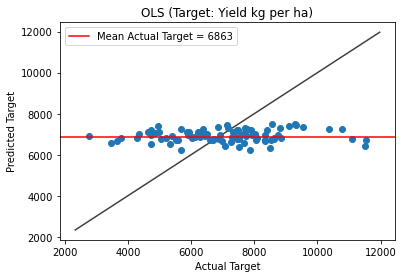

Lasso
MAE on test data: 1388.866610388581
RMSE on test data: 1754.426411802735
R squared on test data: 0.005015356727978482
MAPE on test data: 22.273632427150734


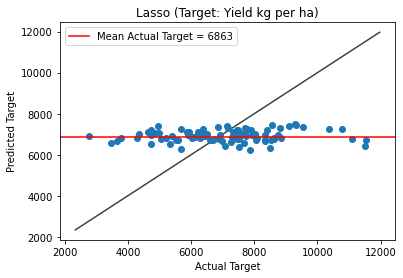

Ridge
MAE on test data: 1388.9461241501285
RMSE on test data: 1754.1369824534365
R squared on test data: 0.005343616724463152
MAPE on test data: 22.273164997939592


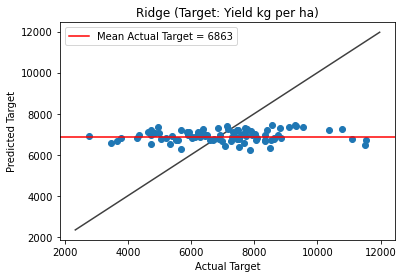

ElasticNet
MAE on test data: 1388.8626710755625
RMSE on test data: 1754.4402948688926
R squared on test data: 0.004999609709819941
MAPE on test data: 22.27343187661701


SVR
MAE on test data: 1361.4573654177702
RMSE on test data: 1731.562182714745
R squared on test data: 0.030780264313623906
MAPE on test data: 21.854041585740376


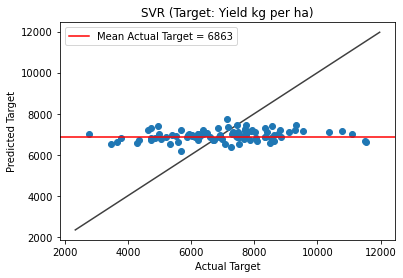

GBR
MAE on test data: 1467.6861043868273
RMSE on test data: 1866.5628653930785
R squared on test data: -0.12624093191317365
MAPE on test data: 23.21928640090867


XGBoost
MAE on test data: 1346.1834176374032
RMSE on test data: 1727.5126368332803
R squared on test data: 0.0353083260983611
MAPE on test data: 21.533816419156928


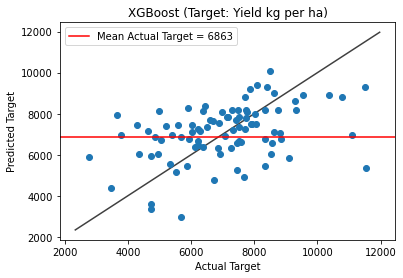

[17:09:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1417.1749354360645
RMSE on test data: 1780.563215645521
R squared on test data: -0.01030507548105497
MAPE on test data: 22.922478207408776


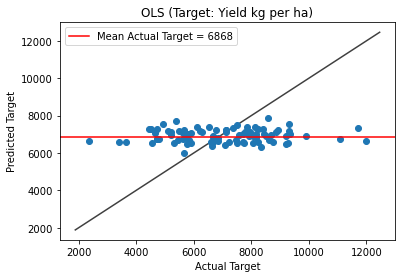

Lasso
MAE on test data: 1416.7786977481392
RMSE on test data: 1780.239109960635
R squared on test data: -0.009937308906935227
MAPE on test data: 22.918860522701596


Ridge
MAE on test data: 1415.1890139482941
RMSE on test data: 1778.3501754369986
R squared on test data: -0.007795244566173087
MAPE on test data: 22.895833041478024


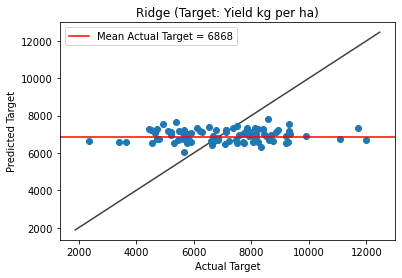

ElasticNet
MAE on test data: 1416.8242198476419
RMSE on test data: 1780.2790783851294
R squared on test data: -0.009982657934463512
MAPE on test data: 22.919258079675142


SVR
MAE on test data: 1396.6069550667448
RMSE on test data: 1751.998395835859
R squared on test data: 0.021850699024342335
MAPE on test data: 22.749242670532848


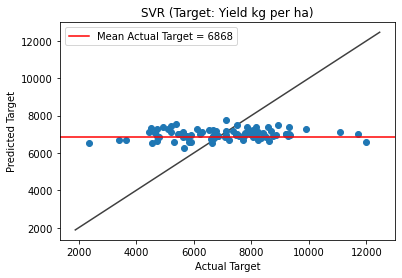

GBR
MAE on test data: 1434.390592376289
RMSE on test data: 1853.6178233644189
R squared on test data: -0.09490927324834608
MAPE on test data: 22.79518970937576


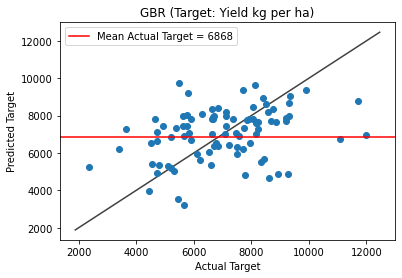

XGBoost
MAE on test data: 1385.536227595435
RMSE on test data: 1793.0522428222598
R squared on test data: -0.024527517413167388
MAPE on test data: 21.95183016075093


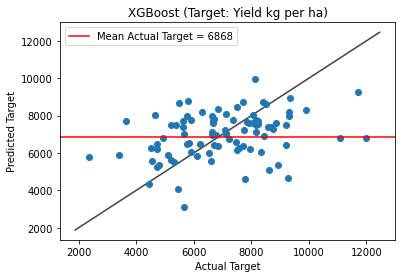

[17:10:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1123.5258846159104
RMSE on test data: 1381.4689448566878
R squared on test data: 0.001987774305027501
MAPE on test data: 18.315098524873076


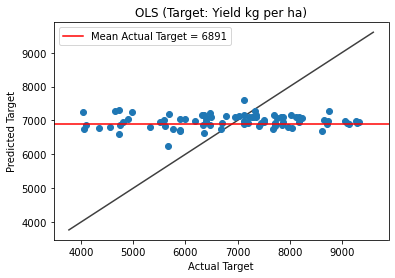

Lasso
MAE on test data: 1123.6577947669075
RMSE on test data: 1381.33901466336
R squared on test data: 0.002175495967459362
MAPE on test data: 18.31670875782628


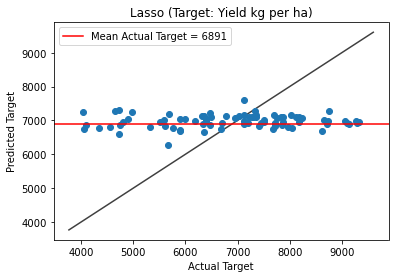

Ridge
MAE on test data: 1123.674260164715
RMSE on test data: 1380.5080966803291
R squared on test data: 0.0033755792892311565
MAPE on test data: 18.319010675982533


ElasticNet
MAE on test data: 1123.6413273321687
RMSE on test data: 1381.3549989553887
R squared on test data: 0.002152402996975944
MAPE on test data: 18.316507925049677


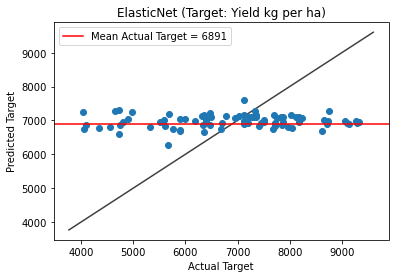

SVR
MAE on test data: 1112.2582844223223
RMSE on test data: 1378.4104028857257
R squared on test data: 0.006402036744837969
MAPE on test data: 18.114533825691556


GBR
MAE on test data: 1258.7479246228777
RMSE on test data: 1552.3366857852711
R squared on test data: -0.2601593052131692
MAPE on test data: 18.99796359849064


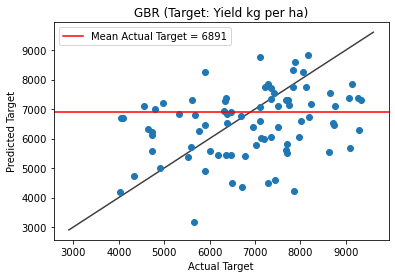

XGBoost
MAE on test data: 1093.8926413855613
RMSE on test data: 1357.9512285440678
R squared on test data: 0.035678270346205854
MAPE on test data: 16.747787889447586


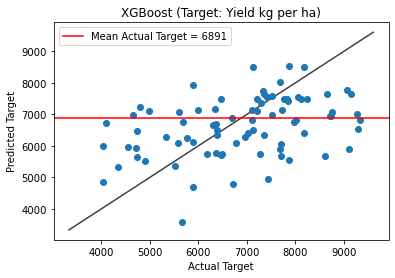

[17:10:39] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1179.8103697656402
RMSE on test data: 1447.8161824063118
R squared on test data: -0.05508041122797991
MAPE on test data: 19.431456448495577


Lasso
MAE on test data: 1179.7920200876447
RMSE on test data: 1447.781200854214
R squared on test data: -0.055029426987108554
MAPE on test data: 19.431108394940097


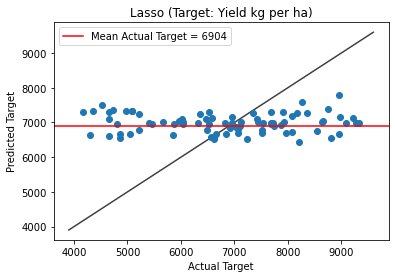

Ridge
MAE on test data: 1178.10316369315
RMSE on test data: 1444.0507052748126
R squared on test data: -0.04959944633988078
MAPE on test data: 19.395399898841294


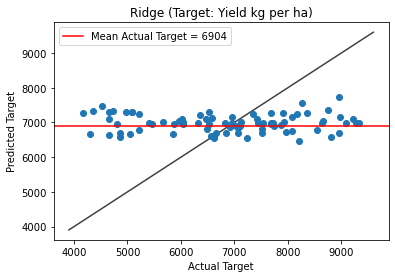

ElasticNet
MAE on test data: 1179.7802050069265
RMSE on test data: 1447.7584441802687
R squared on test data: -0.05499626068826724
MAPE on test data: 19.430882806659607


SVR
MAE on test data: 1164.6678174369536
RMSE on test data: 1439.6829281340752
R squared on test data: -0.04325966439456996
MAPE on test data: 19.11628497536716


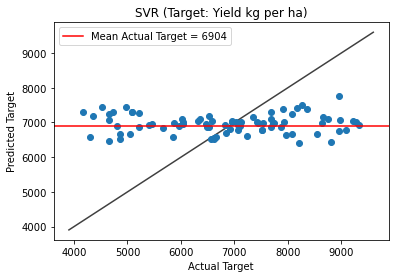

GBR
MAE on test data: 1229.4529000282494
RMSE on test data: 1582.7492997106876
R squared on test data: -0.260906742523743
MAPE on test data: 19.35637538078647


XGBoost
MAE on test data: 1174.5860808603911
RMSE on test data: 1499.07137416017
R squared on test data: -0.13110605993205549
MAPE on test data: 18.73253547551121


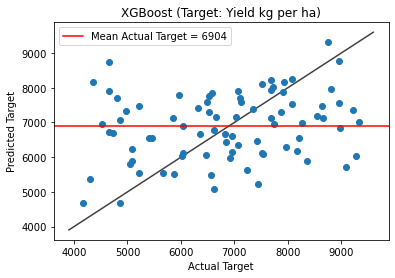

[17:11:02] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1084.5926082461267
RMSE on test data: 1301.5110935107487
R squared on test data: -0.019995022589248235
MAPE on test data: 17.342889581033774


Lasso
MAE on test data: 1084.6090590175158
RMSE on test data: 1301.215454303173
R squared on test data: -0.01953168997072341
MAPE on test data: 17.3440625499293


Ridge
MAE on test data: 1084.5532891752528
RMSE on test data: 1300.0794684883908
R squared on test data: -0.017752325946192027
MAPE on test data: 17.345295630023106


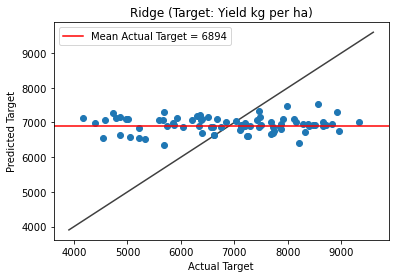

ElasticNet
MAE on test data: 1084.6070226874253
RMSE on test data: 1301.2521001503524
R squared on test data: -0.01958911647681849
MAPE on test data: 17.343916247567787


SVR
MAE on test data: 1059.4481026629508
RMSE on test data: 1283.2647248447943
R squared on test data: 0.008403884809413231
MAPE on test data: 17.029591340659437


GBR
MAE on test data: 1039.232823293091
RMSE on test data: 1346.584031179238
R squared on test data: -0.09186570199734945
MAPE on test data: 15.95001884755397


XGBoost
MAE on test data: 1055.9263580992117
RMSE on test data: 1316.964046088528
R squared on test data: -0.04435978781094163
MAPE on test data: 16.46208217453783


[17:11:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 1131.4507980909802
RMSE on test data: 1393.0770718215176
R squared on test data: 0.038906715587104124
MAPE on test data: 18.619903387191215


Lasso
MAE on test data: 1132.0835155114162
RMSE on test data: 1393.647768542805
R squared on test data: 0.03811909924215662
MAPE on test data: 18.629596658224


Ridge
MAE on test data: 1132.975637369584
RMSE on test data: 1394.6919166379182
R squared on test data: 0.03667723943973056
MAPE on test data: 18.643700052433445


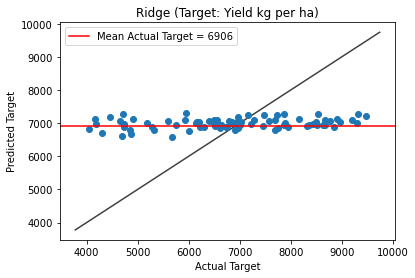

ElasticNet
MAE on test data: 1132.0044346945613
RMSE on test data: 1393.5761642514447
R squared on test data: 0.038217937747072384
MAPE on test data: 18.62838526085609


SVR
MAE on test data: 1133.3159138073725
RMSE on test data: 1398.1285706241072
R squared on test data: 0.0319239519339678
MAPE on test data: 18.83017716617906


GBR
MAE on test data: 1161.789686169127
RMSE on test data: 1522.1849073157898
R squared on test data: -0.1474930846899769
MAPE on test data: 18.050513971666867


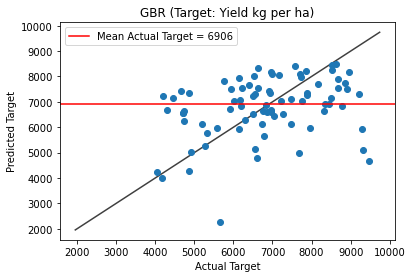

XGBoost
MAE on test data: 1154.3873940640717
RMSE on test data: 1466.1149119861823
R squared on test data: -0.06451375115662938
MAPE on test data: 18.212945629118877


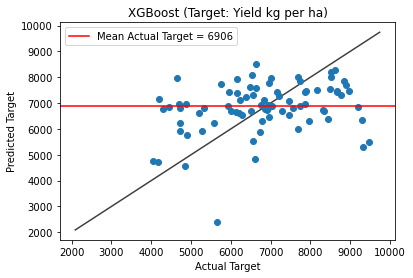

[17:11:46] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 947.0186284110262
RMSE on test data: 1154.7370500545373
R squared on test data: -0.04521919209443803
MAPE on test data: 15.197860007202879


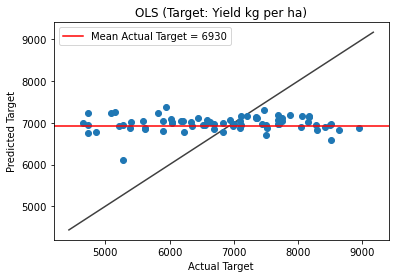

Lasso
MAE on test data: 947.0095025790591
RMSE on test data: 1154.3997292983465
R squared on test data: -0.044608624292138854
MAPE on test data: 15.198934685281198


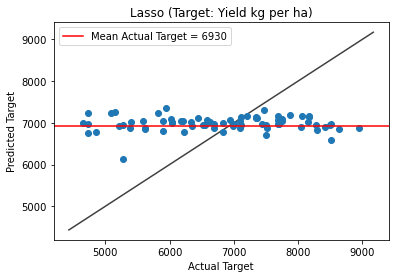

Ridge
MAE on test data: 947.2424087980113
RMSE on test data: 1153.2723349130797
R squared on test data: -0.04256927726173343
MAPE on test data: 15.208865906712388


ElasticNet
MAE on test data: 947.0107172876451
RMSE on test data: 1154.4417007981895
R squared on test data: -0.04468458513417772
MAPE on test data: 15.19880148250847


SVR
MAE on test data: 949.0897430895675
RMSE on test data: 1157.6624214872725
R squared on test data: -0.050521745509455984
MAPE on test data: 15.155908612861968


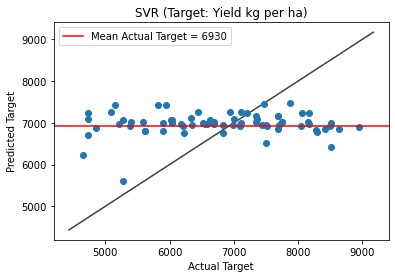

GBR
MAE on test data: 841.8221384859869
RMSE on test data: 1055.346557521898
R squared on test data: 0.12696557230970418
MAPE on test data: 13.146596820847744


XGBoost
MAE on test data: 880.4204681202123
RMSE on test data: 1127.4947334135964
R squared on test data: 0.0035162556422175806
MAPE on test data: 13.903766030929374


[17:12:08] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 897.998414185511
RMSE on test data: 1142.449127680503
R squared on test data: -0.07117736577004785
MAPE on test data: 13.885322180998646


Lasso
MAE on test data: 897.9848759806566
RMSE on test data: 1142.425346971807
R squared on test data: -0.07113277193885015
MAPE on test data: 13.885150418251257


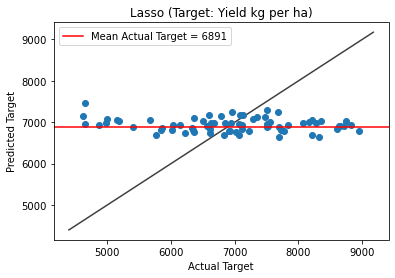

Ridge
MAE on test data: 895.8802199816154
RMSE on test data: 1139.262863333375
R squared on test data: -0.06521071972426351
MAPE on test data: 13.854925210622815


ElasticNet
MAE on test data: 897.9758309814697
RMSE on test data: 1142.4096977739164
R squared on test data: -0.07110342690733029
MAPE on test data: 13.885034147092368


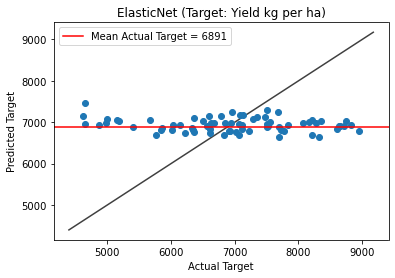

SVR
MAE on test data: 857.9870105177348
RMSE on test data: 1097.3613128998336
R squared on test data: 0.011704228937013839
MAPE on test data: 13.291844134887466


GBR
MAE on test data: 939.3778887937029
RMSE on test data: 1184.1778046970226
R squared on test data: -0.15085730854208945
MAPE on test data: 13.978038088024675


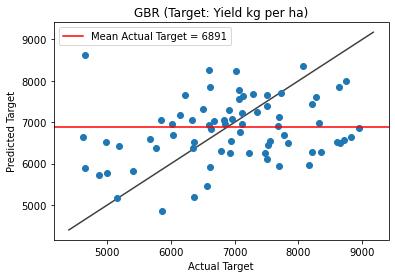

XGBoost
MAE on test data: 879.9556963410765
RMSE on test data: 1160.3451011144514
R squared on test data: -0.10499927388323416
MAPE on test data: 13.141059766317987


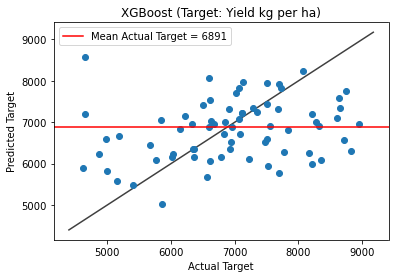

[17:12:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 979.7199327036885
RMSE on test data: 1188.7016896322996
R squared on test data: -0.0020485021562282046
MAPE on test data: 15.267167969695652


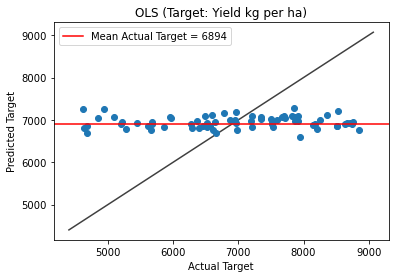

Lasso
MAE on test data: 980.1431493680429
RMSE on test data: 1188.9468015034788
R squared on test data: -0.002461792233096949
MAPE on test data: 15.274765514774675


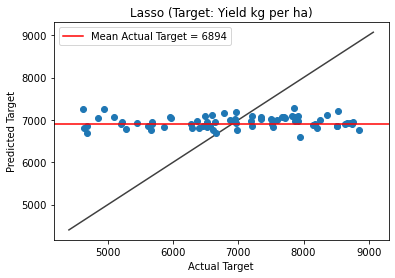

Ridge
MAE on test data: 980.4770430734983
RMSE on test data: 1188.6621470029413
R squared on test data: -0.0019818361897918635
MAPE on test data: 15.281241616426675


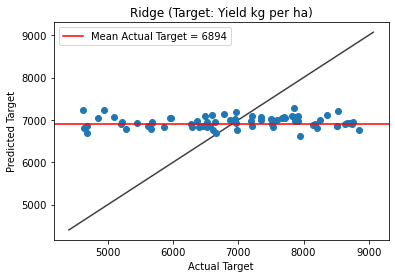

ElasticNet
MAE on test data: 980.0901893972979
RMSE on test data: 1188.9158514738908
R squared on test data: -0.0024096018100059347
MAPE on test data: 15.273815037066738


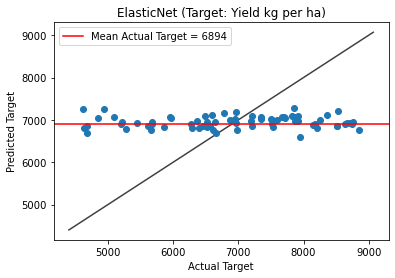

SVR
MAE on test data: 974.5786330608573
RMSE on test data: 1185.720897959345
R squared on test data: 0.002970676129586902
MAPE on test data: 15.242777411344063


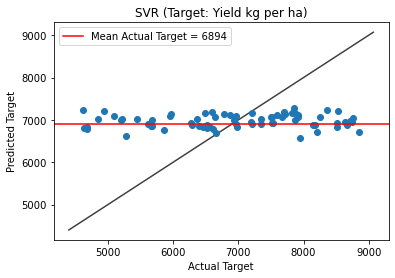

GBR
MAE on test data: 883.0007705571896
RMSE on test data: 1219.3454977669128
R squared on test data: -0.05437849925190075
MAPE on test data: 13.066451724608877


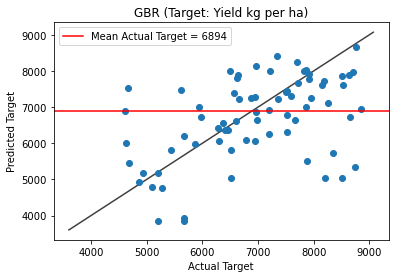

XGBoost
MAE on test data: 836.1113165627368
RMSE on test data: 1108.5658420063496
R squared on test data: 0.12850285552794205
MAPE on test data: 12.127630081532173


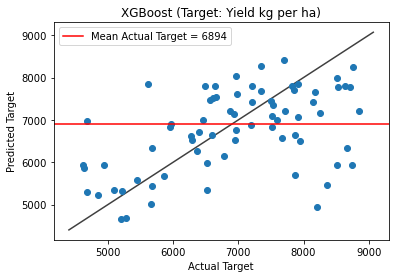

[17:12:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
OLS
MAE on test data: 953.1104808194555
RMSE on test data: 1137.2924368925728
R squared on test data: 0.03715658127966004
MAPE on test data: 14.570192480648553


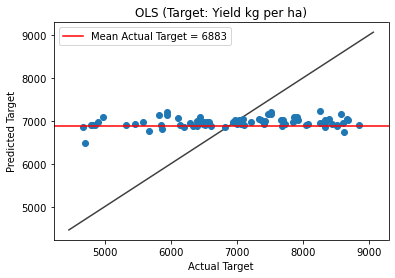

Lasso
MAE on test data: 953.605446096887
RMSE on test data: 1137.5820690434055
R squared on test data: 0.03666610774631707
MAPE on test data: 14.577005053571929


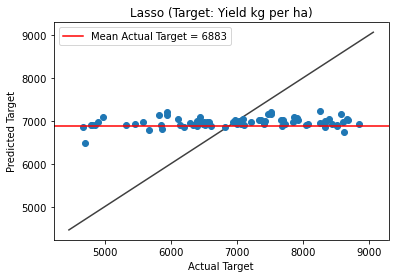

Ridge
MAE on test data: 954.4480674156914
RMSE on test data: 1138.0863087644648
R squared on test data: 0.03581191202306799
MAPE on test data: 14.589849213202754


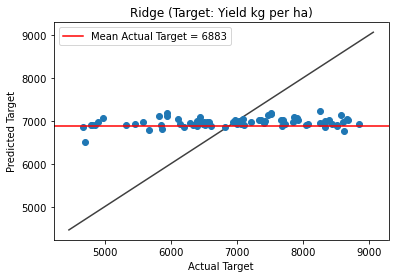

ElasticNet
MAE on test data: 953.5435826801173
RMSE on test data: 1137.5456138889358
R squared on test data: 0.03672784909069471
MAPE on test data: 14.57615369360685


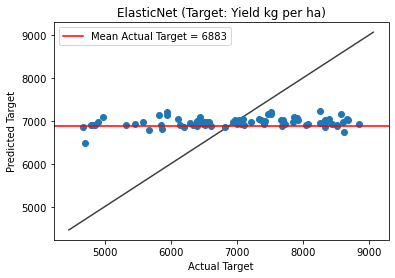

SVR
MAE on test data: 944.7933185998627
RMSE on test data: 1135.4895541847225
R squared on test data: 0.040206839574990494
MAPE on test data: 14.381810030271813


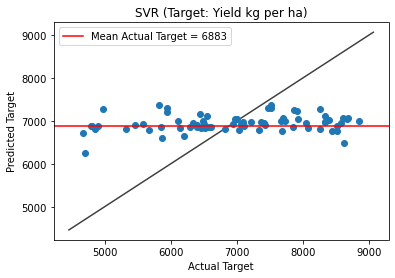

GBR
MAE on test data: 994.8082751021177
RMSE on test data: 1310.1194712691884
R squared on test data: -0.2777125679389425
MAPE on test data: 15.086000666509955


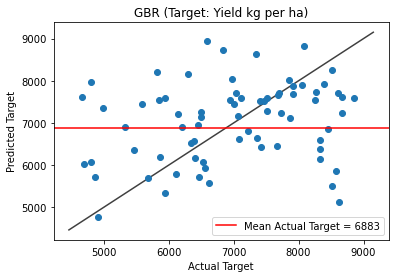

XGBoost
MAE on test data: 990.5333818674139
RMSE on test data: 1275.3665105486082
R squared on test data: -0.21082500678499816
MAPE on test data: 14.869933851920964


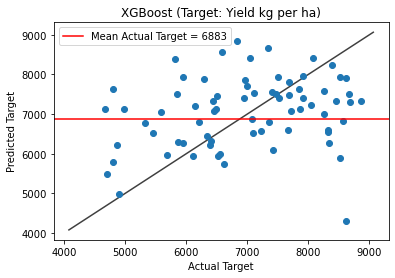

r_2_all_data  r_2_90_percentile  r_2_80_percentile
0     -0.096308           0.035678           0.003516
1      0.013086          -0.131106          -0.104999
2      0.035308          -0.044360           0.128503
3     -0.024528          -0.064514          -0.210825

None


In [12]:
r_0_50 = build_models(df_dy_wy_ratio_winter_combined_parents, 0, 50)
r_0_60 = build_models(df_dy_wy_ratio_winter_combined_parents, 0, 60)
r_0_70 = build_models(df_dy_wy_ratio_winter_combined_parents, 0, 70)
r_0_80 = build_models(df_dy_wy_ratio_winter_combined_parents, 0, 80)
r_05_50 = build_models(df_dy_wy_ratio_winter_combined_parents, .05, 50)
r_05_60 = build_models(df_dy_wy_ratio_winter_combined_parents, .05, 60)
r_05_70 = build_models(df_dy_wy_ratio_winter_combined_parents, .05, 70)
r_05_80 = build_models(df_dy_wy_ratio_winter_combined_parents, .05, 80)
r_1_50 = build_models(df_dy_wy_ratio_winter_combined_parents, .1, 50)
r_1_60 = build_models(df_dy_wy_ratio_winter_combined_parents, .1, 60)
r_1_70 = build_models(df_dy_wy_ratio_winter_combined_parents, .1, 70)
r_1_80 = build_models(df_dy_wy_ratio_winter_combined_parents, .1, 80)

list0 = [r_0_50, r_0_60, r_0_70, r_0_80]
list05 = [r_05_50, r_05_60, r_05_70, r_05_80]
list1 = [r_1_50, r_1_60, r_1_70, r_1_80]

print(display(pd.DataFrame(data = {'r_2_all_data': list0, 'r_2_90_percentile': list05, 'r_2_80_percentile': list1})))